## Run MOFAcell pipeline on features

In [1]:
import muon as mu
import liana as li
import numpy as np
import mofax as mofa
from plotnine import *

/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


In [2]:
features = mu.read_h5mu("../../data/celltype_features.h5mu")

/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
/home/loan/miniforge3/envs/liana/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.


In [4]:
# n_factors = 6

In [20]:
for modality_name, modality_data in features.mod.items():
    print(f"Modality name: {modality_name}")
    # Center and scale each column of the data, ignoring NA values
    modality_data.X = modality_data.X - np.nanmean(modality_data.X, axis=0, keepdims=True)
    modality_data.X = modality_data.X / np.nanstd(modality_data.X, axis=0)

Modality name: Other_immune_cell
Modality name: Fibroblast
Modality name: Macrophage
Modality name: CD4_lymphocyte
Modality name: Epithelial_cell
Modality name: Endothelial_cell
Modality name: Monocyte
Modality name: Cytotoxic_lymphocyte


In [21]:
mu.tl.mofa(features,
           use_obs='union',
           convergence_mode='medium',
           scale_groups=False,
           scale_views=False,
           seed=1337,
           outfile='../../data/mofacell_sim.h5ad',
           use_var=None
           )


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Other_immune_cell' group='group1' with N=423 samples and D=33 features...
Loaded view='Fibroblast' group='group1' with N=423 samples and D=29 features...
Loaded view='Macrophage' group='group1' with N=423 samples and D=28 features...
Loaded view='CD4_lymphocyte' group='group1' with N=423 samples and D=21 features...
Loaded view='Epithelial_cell' group='group1' with 

In [22]:
# obtain factor scores
factor_scores = li.ut.get_factor_scores(features, obsm_key='X_mofa', obs_keys=['Stage'])
factor_scores.head()

index   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0   A1a  2.889374  1.177784  1.705773 -2.822681  1.996864 -2.787387 -0.098942   
1   A1c  0.716308 -0.815725  1.245522  1.523723  1.168323  0.207136  0.119778   
2   A1d  1.278130  0.647466  1.286519 -0.501799  0.888457  0.994333  0.599709   
3   A1e  1.525180 -0.609291 -0.854586  0.672808  1.673314 -0.518315 -1.390029   
4   A1f  1.953857  0.571260  0.700761 -0.637248  1.316250 -0.638369  0.772807   

         Factor8        Factor9       Factor10 Stage  
0 -3.430243e-112 -6.941962e-113  7.581742e-112   pT3  
1  8.095371e-112  1.759288e-112 -1.829358e-111   pT4  
2 -2.979024e-112 -6.099481e-113  6.605760e-112   pT3  
3 -3.411118e-112 -7.507681e-113  7.740044e-112   pT4  
4 -4.703852e-113 -3.736348e-114  8.495434e-113   pT1

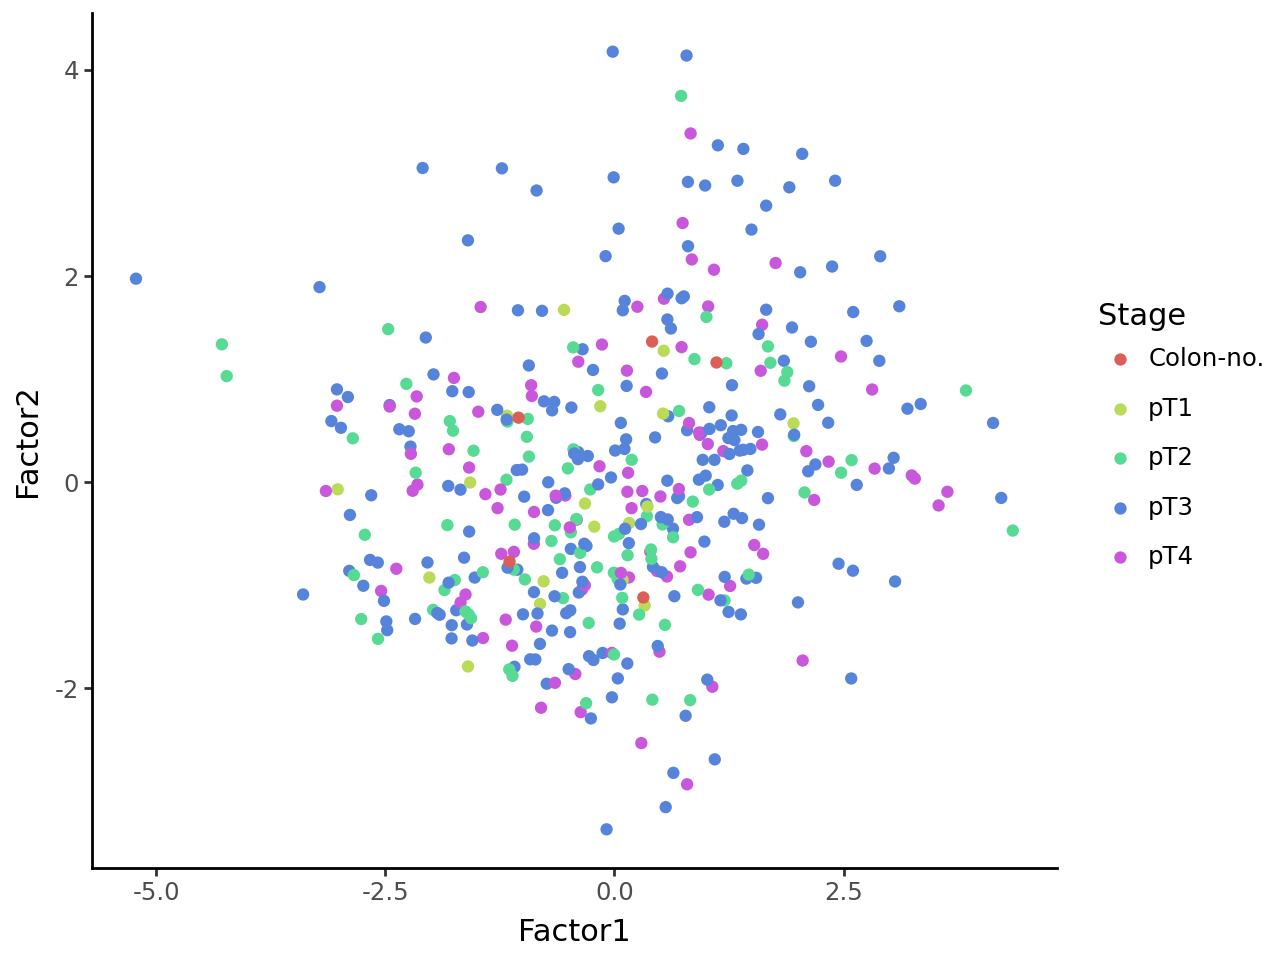

In [23]:
ggplot(factor_scores, aes(x='Factor1', y='Factor2', color='Stage')) + geom_point() + theme_classic()

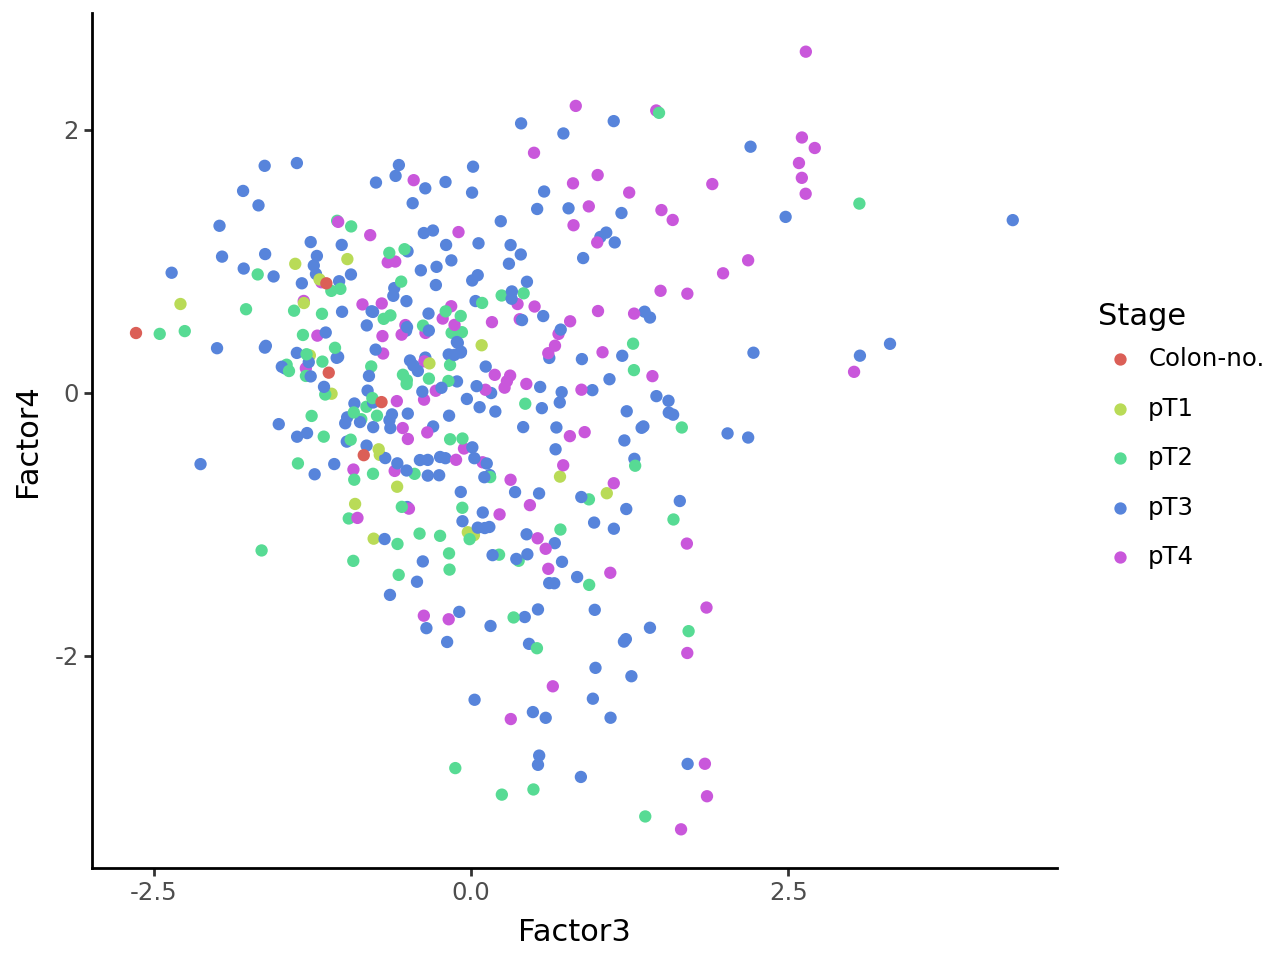

In [24]:
ggplot(factor_scores, aes(x='Factor3', y='Factor4', color='Stage')) + geom_point() + theme_classic()

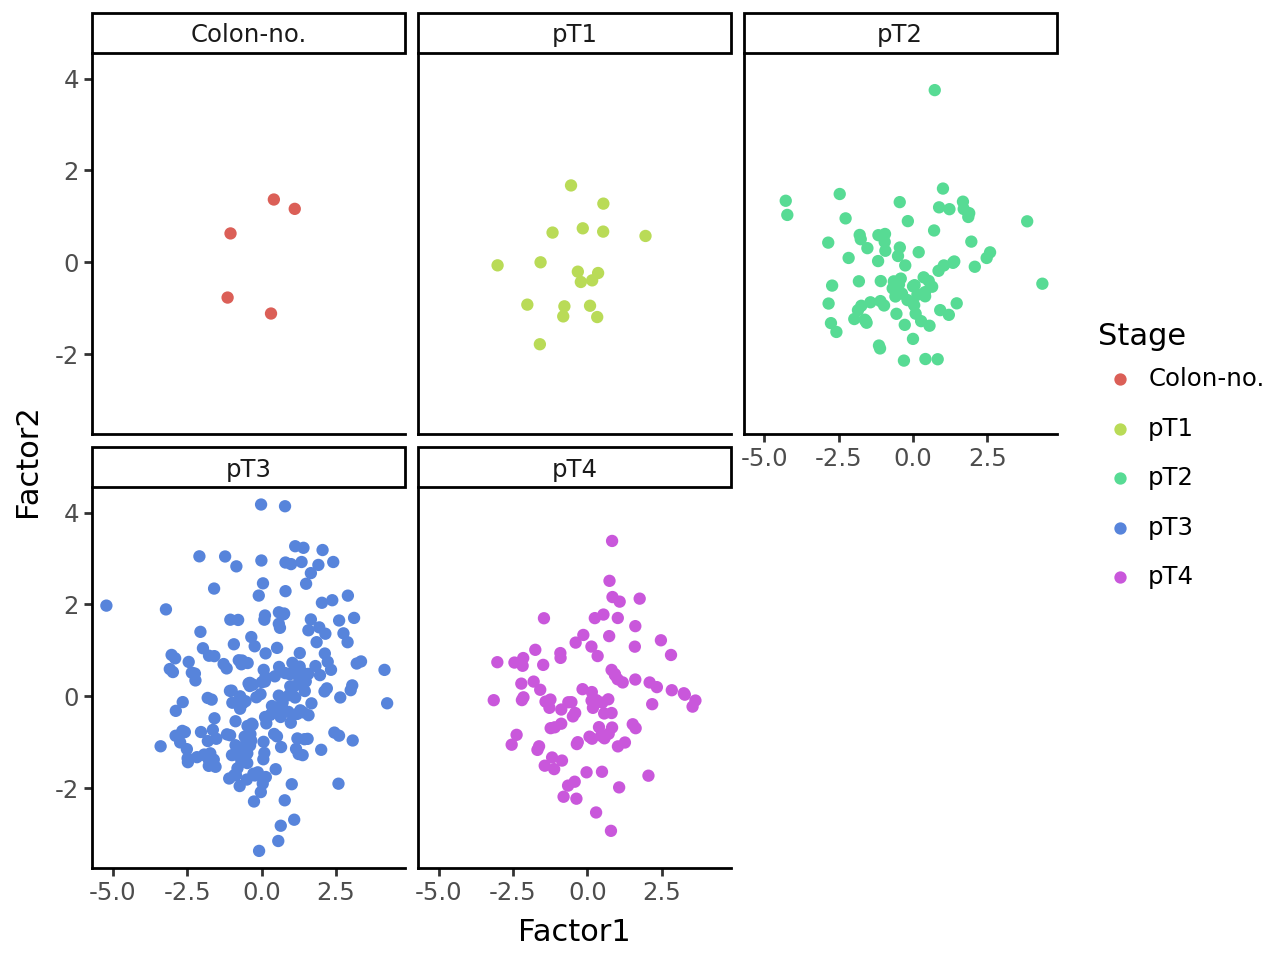

In [25]:
ggplot(factor_scores, aes(x='Factor1', y='Factor2', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

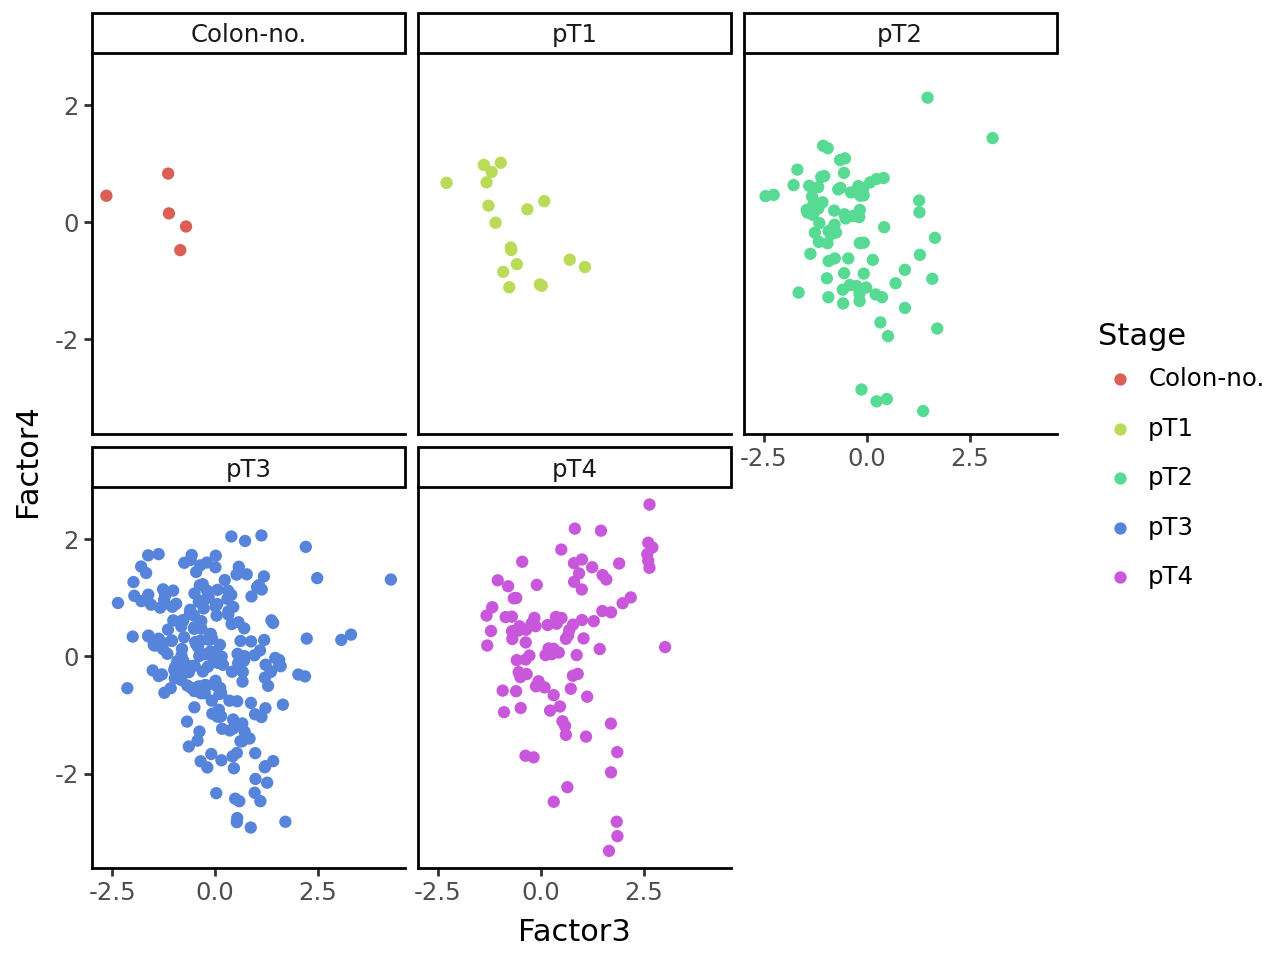

In [26]:
ggplot(factor_scores, aes(x='Factor3', y='Factor4', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

In [27]:
variable_loadings = li.ut.get_variable_loadings(features, varm_key='LFs') # get loadings

In [28]:
# Add cell type (view) to the variable loadings
variable_loadings['view'] = ''
for view in features.mod.keys():
    variable_loadings.loc[np.arange(len(features.varm[view]))[features.varm[view]],"view"] = view
    
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False) # Default
variable_loadings.head()

index   Factor1   Factor2   Factor3   Factor4   Factor5  \
196                 area -0.428395  0.296009  0.067140  0.011145  0.007931   
221                 area -0.416193  0.297909 -0.137646 -0.000013 -0.007568   
195            perimeter -0.414582  0.292881  0.030484  0.013787  0.033348   
202  metabolic_cluster_1  0.401825  0.361544  0.114957 -0.253710 -0.063652   
220            perimeter -0.400246  0.276301 -0.188221 -0.000003 -0.002514   

      Factor6   Factor7        Factor8        Factor9       Factor10  \
196  0.000013  0.008161  7.940190e-113  1.834730e-113 -1.838954e-112   
221 -0.007806  0.017314 -1.483895e-112 -3.088522e-113  3.297173e-112   
195  0.000103  0.008772  2.777517e-112  6.083877e-113 -6.307970e-112   
202  0.000784 -0.009607 -2.765324e-112 -5.832713e-113  6.170724e-112   
220 -0.005058  0.019593  6.964623e-114  2.654775e-114 -1.960272e-113   

                 view  
196  Endothelial_cell  
221          Monocyte  
195  Endothelial_cell  
202          Monocyte  
220          Monocyte

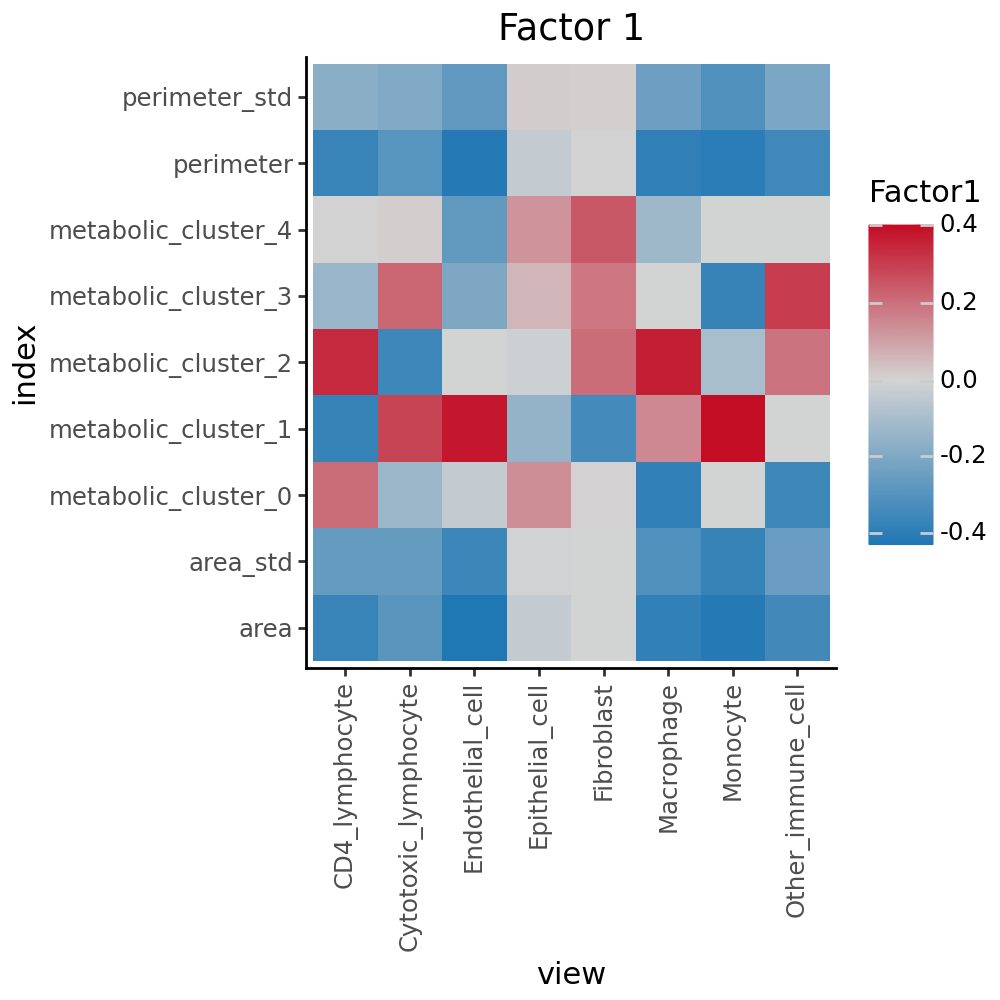

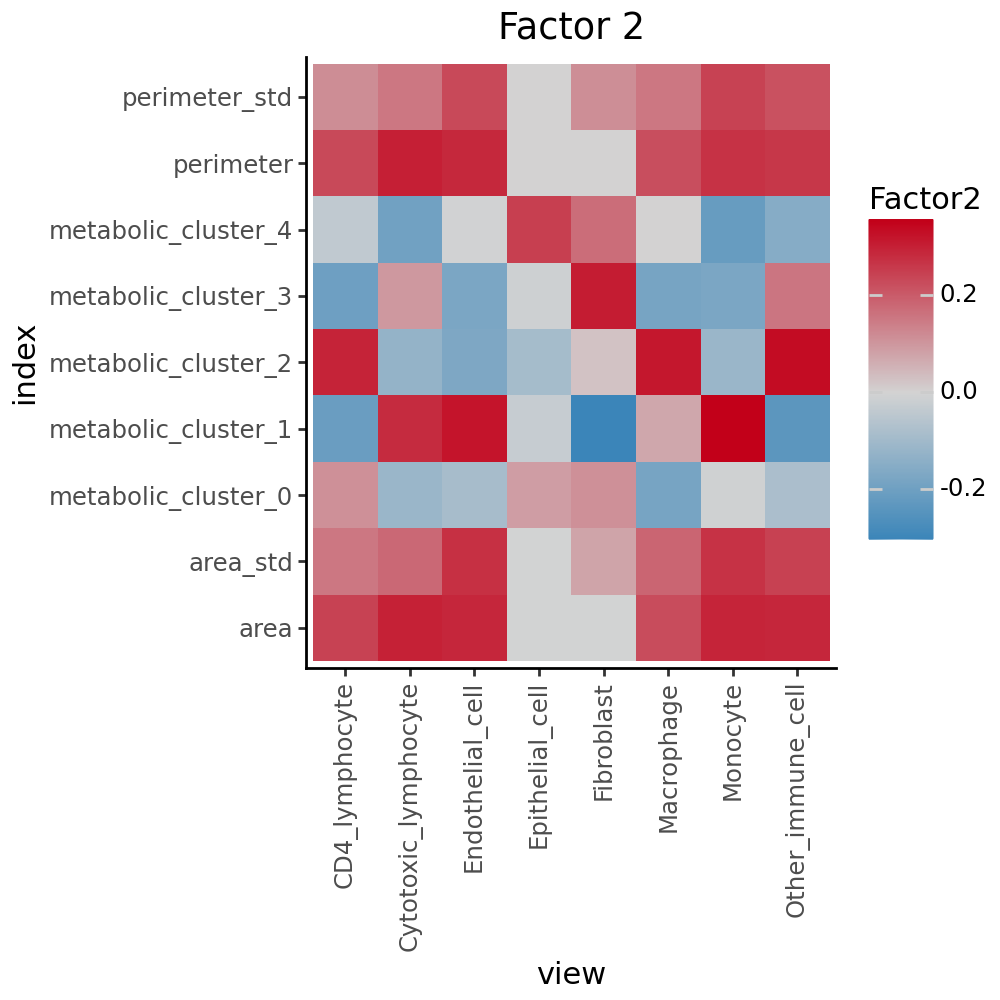

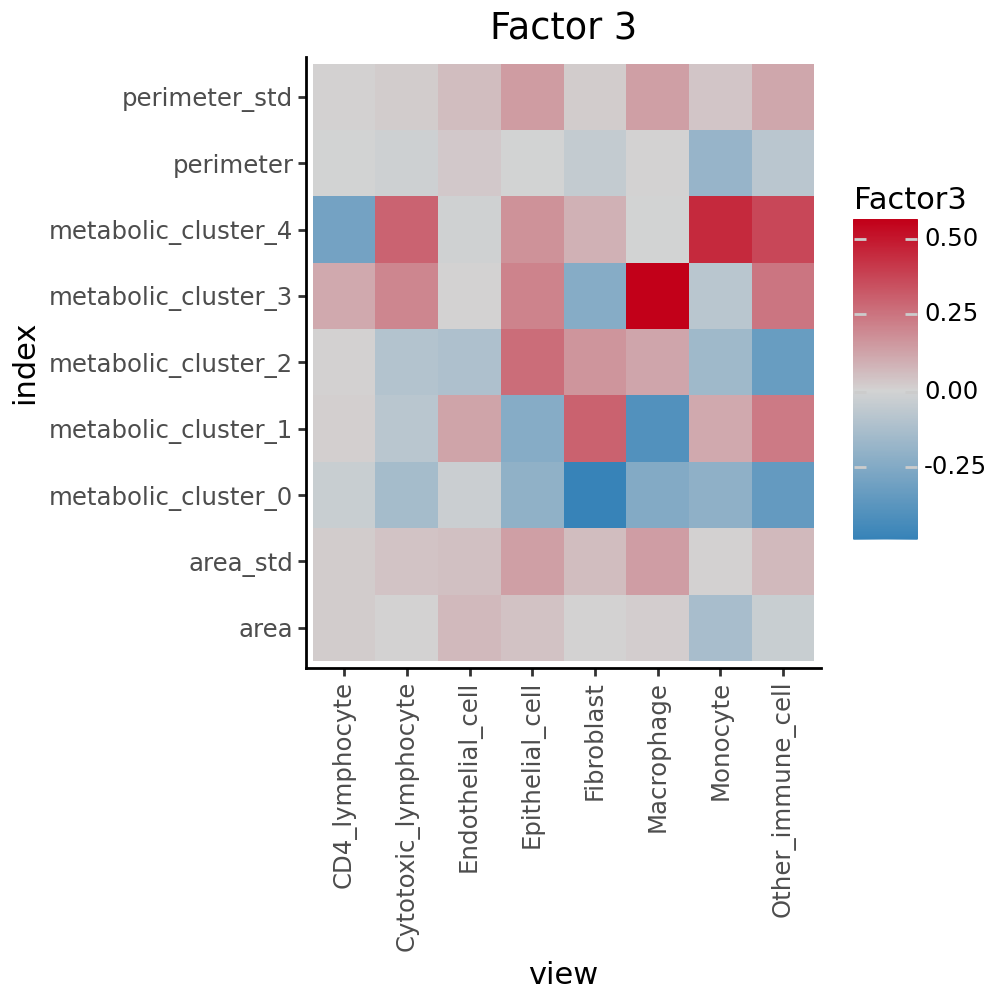

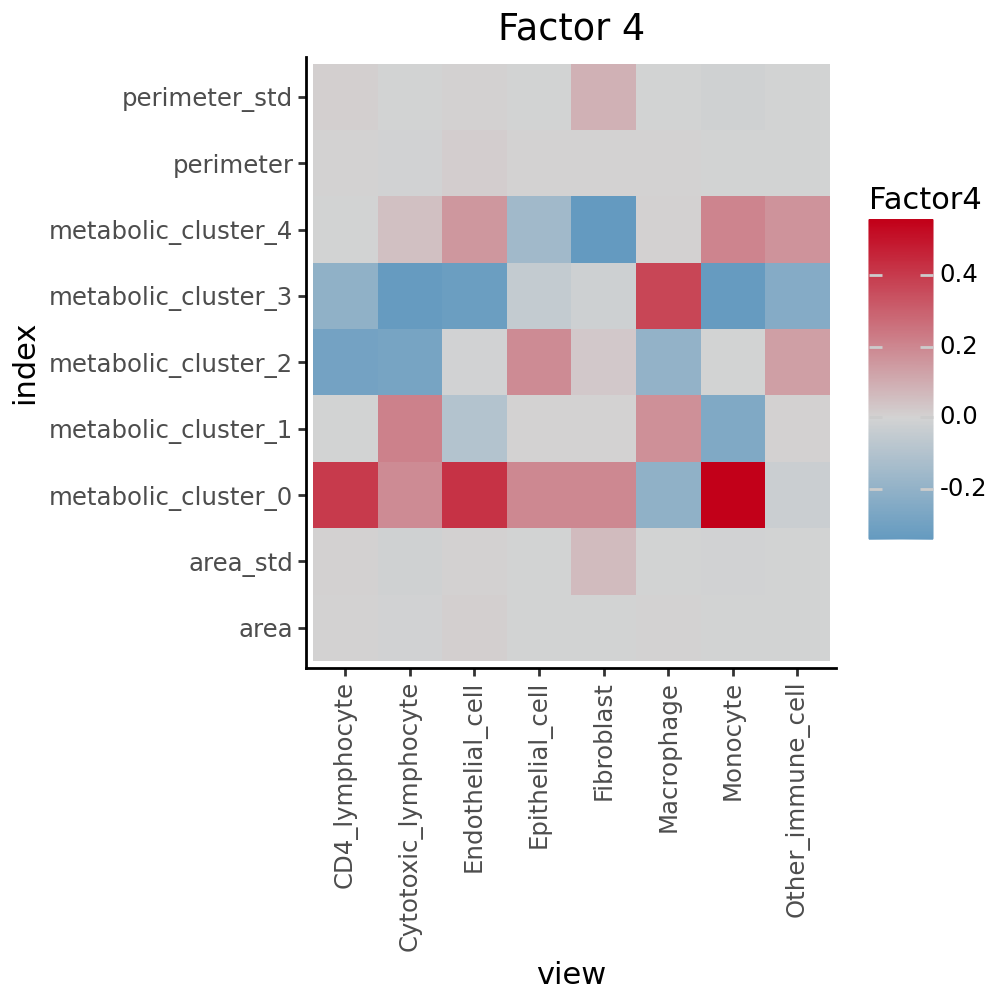

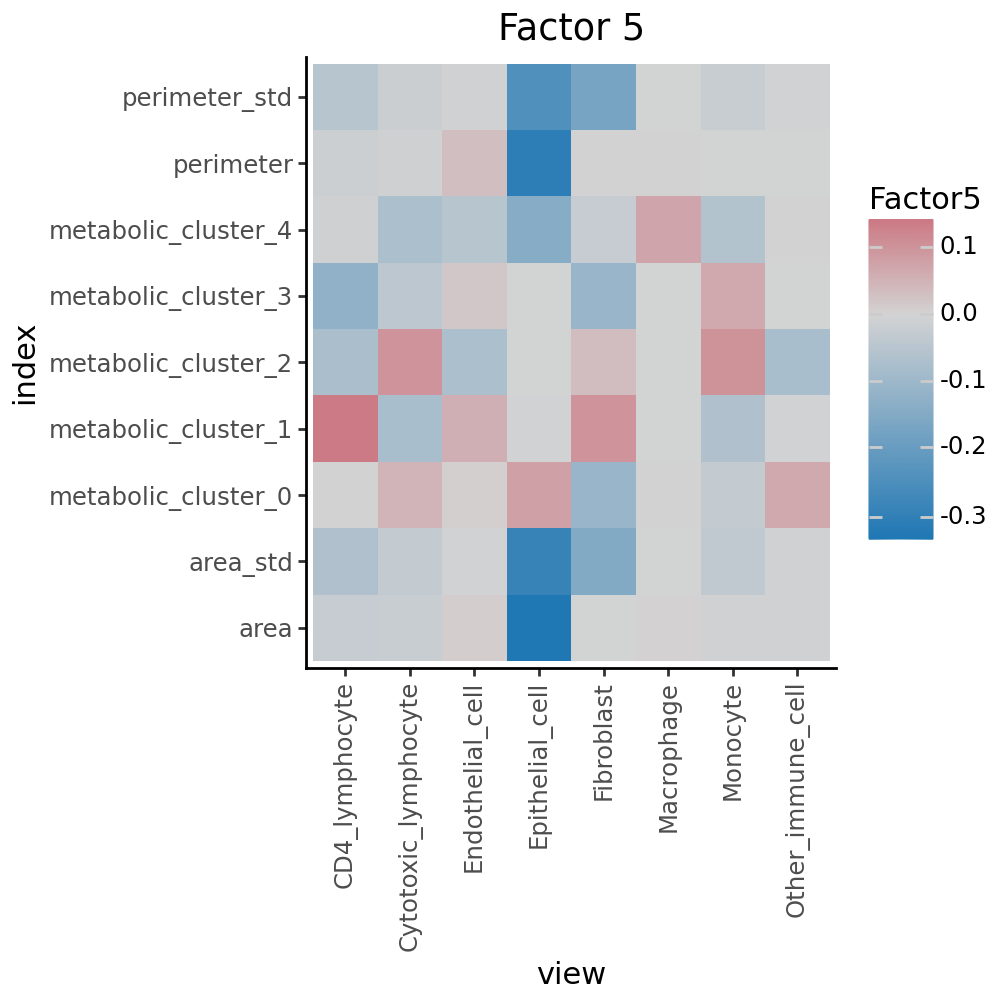

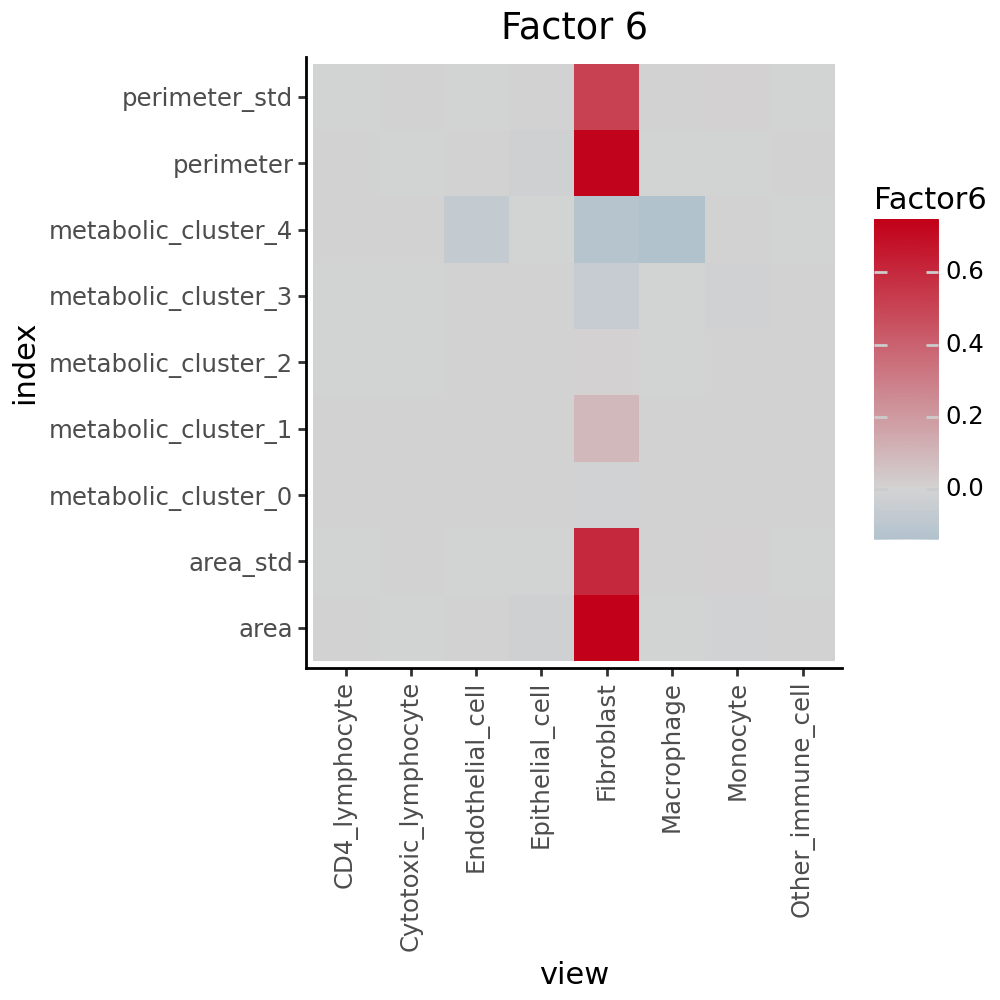

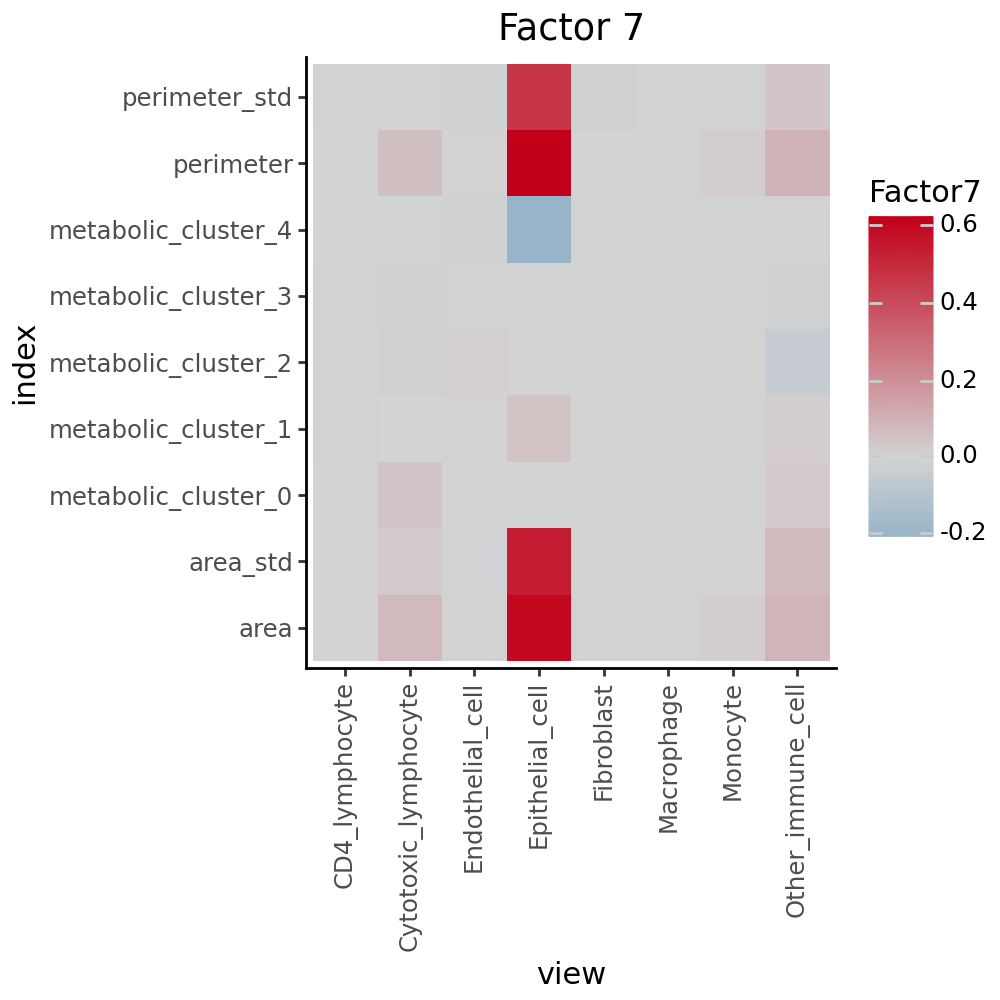

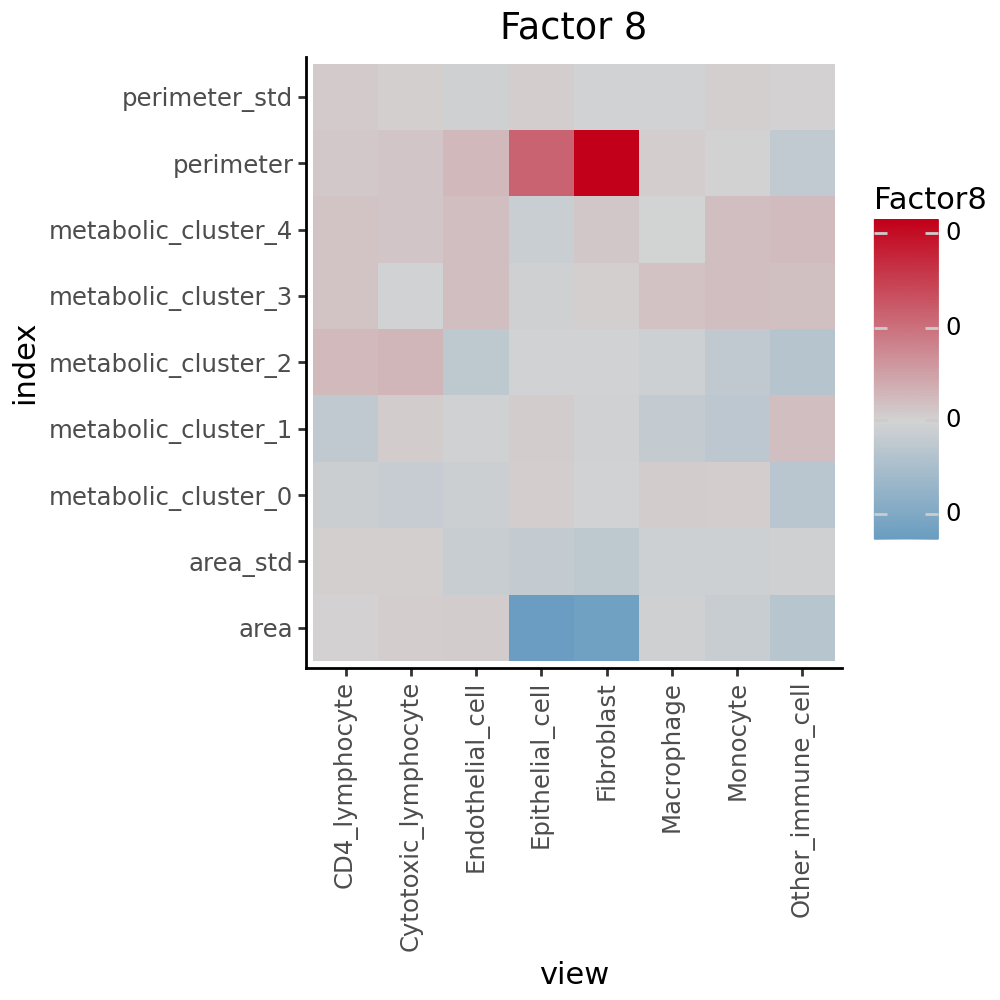

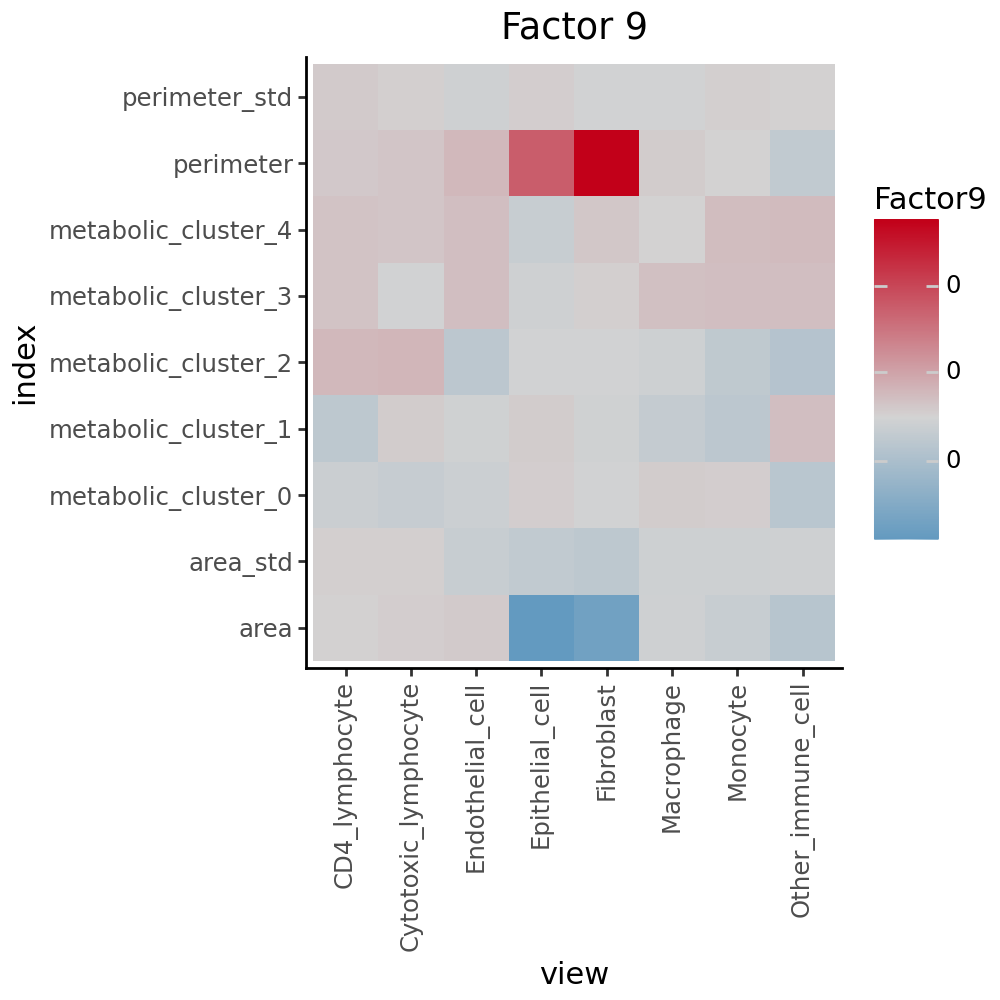

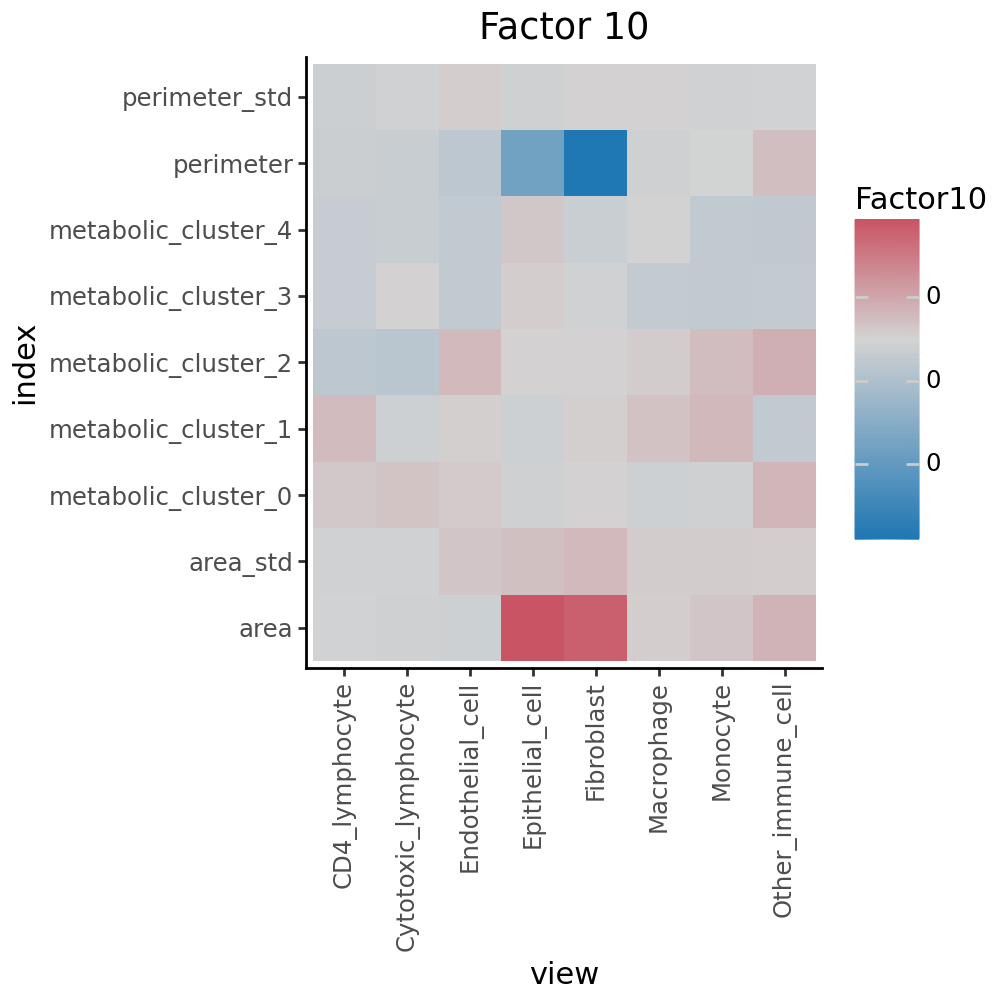

In [29]:
# get top genes with highest absolute loadings across all views
top_genes = variable_loadings['index'].head(30)
top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

for fnum in range(1, top_loadings.shape[1] - 1):
    # plot them
    # dotplot of variable, view, loadings
    gp = (ggplot(top_loadings) +
        ggtitle(f"Factor {fnum}") +
        aes(x='view', y='index', fill=f'Factor{fnum}') +
        geom_tile() +
        scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
        theme_classic() +
        theme(axis_text_x=element_text(angle=90, hjust=0.5), figure_size=(5, 5))
    )
    gp.show()

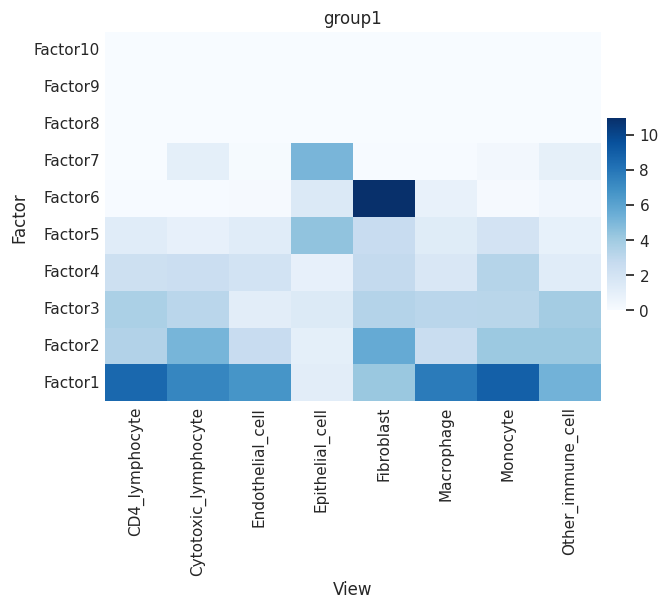

In [30]:
model = mofa.mofa_model('../../data/mofacell_sim.h5ad')
mofa.plot_r2(model, x='View')

In [31]:
model.close()

In [32]:
# Kruksal Wallis test for factor 1 and stage
from scipy.stats import kruskal
for fnum in range(1, top_loadings.shape[1] - 1):
    factor1 = factor_scores[f'Factor{fnum}']
    stage = factor_scores['Stage']
    print(kruskal(factor1[stage == 'pT1'], factor1[stage == 'pT2'], factor1[stage == 'pT3'], factor1[stage == 'pT4'], factor1[stage == 'Colon-no.']))
    # Note: multiply by 10 for Bonferroni correction

KruskalResult(statistic=6.277508677265587, pvalue=0.17936015051892373)
KruskalResult(statistic=4.991176908438092, pvalue=0.28820399823112713)
KruskalResult(statistic=45.960385140482, pvalue=2.510046921326686e-09)
KruskalResult(statistic=8.782033463826792, pvalue=0.06678460214822465)
KruskalResult(statistic=5.890303917558413, pvalue=0.20749158675601032)
KruskalResult(statistic=1.1721099721632982, pvalue=0.8826688351906187)
KruskalResult(statistic=7.437515759750795, pvalue=0.1144963566718148)
KruskalResult(statistic=1.9144602331143687, pvalue=0.7514881422644903)
KruskalResult(statistic=1.91544319332138, pvalue=0.751307505025307)
KruskalResult(statistic=1.898873887961372, pvalue=0.754351861677073)


In [33]:
# order features by absolute value for Factor 3 (associated with disease stage)
variable_loadings = variable_loadings.sort_values(by='Factor3', key=lambda x: abs(x), ascending=False) # Default
variable_loadings.head(15)

index   Factor1   Factor2   Factor3  \
66                  metabolic_cluster_3 -0.000089 -0.185505  0.566439   
34                  metabolic_cluster_0  0.004134  0.116156 -0.492410   
205                 metabolic_cluster_4 -0.000448 -0.216189  0.457567   
90                           proportion  0.102055 -0.117621 -0.419462   
64                  metabolic_cluster_1  0.151774  0.076131 -0.404374   
5                   metabolic_cluster_4 -0.002736 -0.155679  0.376937   
1                   metabolic_cluster_0 -0.353533 -0.081065 -0.348631   
3                   metabolic_cluster_2  0.192843  0.340808 -0.334616   
35                  metabolic_cluster_1 -0.341374 -0.304635  0.303204   
230                 metabolic_cluster_4  0.010493 -0.196444  0.301949   
98   juxtaview.40_l.CD4_Tcell_CD4_Tcell  0.003146 -0.112381 -0.300247   
95                  metabolic_cluster_4  0.002799 -0.039141 -0.297920   
235  juxtaview.40_l.CD8_Tcell_CD8_Tcell -0.027569 -0.115363 -0.294775   
114                 metabolic_cluster_2 -0.013513 -0.092872  0.274005   
0                            proportion  0.000885 -0.306023  0.268243   

      Factor4   Factor5   Factor6   Factor7        Factor8        Factor9  \
66   0.374036 -0.001283 -0.000005  0.000682  1.847622e-112  3.986176e-113   
34   0.200673 -0.110581 -0.010176 -0.007795 -2.112384e-113 -5.147036e-114   
205  0.207914 -0.060074  0.001906  0.000170  2.184211e-112  4.773143e-113   
90   0.000119 -0.252049 -0.000220 -0.007512 -2.842483e-112 -6.034845e-113   
64   0.175186 -0.000235  0.000119  0.000716 -1.807008e-112 -3.848806e-113   
5    0.166811  0.002474 -0.000081  0.003083  2.499551e-112  5.317216e-113   
1   -0.029182  0.067194  0.000011  0.027363 -3.006605e-112 -6.608878e-113   
3    0.138271 -0.079142  0.000006 -0.045701 -3.532254e-112 -7.644152e-113   
35   0.001469  0.102112  0.094308 -0.000403 -4.104713e-113 -7.890190e-114   
230  0.049123 -0.072001  0.000002 -0.004665  1.475563e-112  3.184087e-113   
98   0.002508 -0.062472  0.001459 -0.002014 -2.013247e-113 -4.406508e-114   
95  -0.000794 -0.009745  0.000201 -0.003243  1.560856e-112  3.389689e-113   
235 -0.003238 -0.001622  0.000394 -0.042752 -9.569590e-113 -2.038609e-113   
114  0.187806 -0.002193  0.000023  0.003135 -1.798901e-113 -3.954459e-114   
0   -0.003599 -0.293633  0.000094 -0.078974  2.851986e-113  7.081252e-114   

          Factor10                  view  
66  -4.145978e-112            Macrophage  
34   4.952369e-113            Fibroblast  
205 -4.930406e-112              Monocyte  
90   6.380043e-112        CD4_lymphocyte  
64   4.039170e-112            Macrophage  
5   -5.621250e-112     Other_immune_cell  
1    6.837622e-112     Other_immune_cell  
3    7.990197e-112     Other_immune_cell  
35   8.935298e-113            Fibroblast  
230 -3.322363e-112  Cytotoxic_lymphocyte  
98   4.562089e-113        CD4_lymphocyte  
95  -3.530280e-112        CD4_lymphocyte  
235  2.145052e-112  Cytotoxic_lymphocyte  
114  4.069142e-113       Epithelial_cell  
0   -6.788476e-113     Other_immune_cell

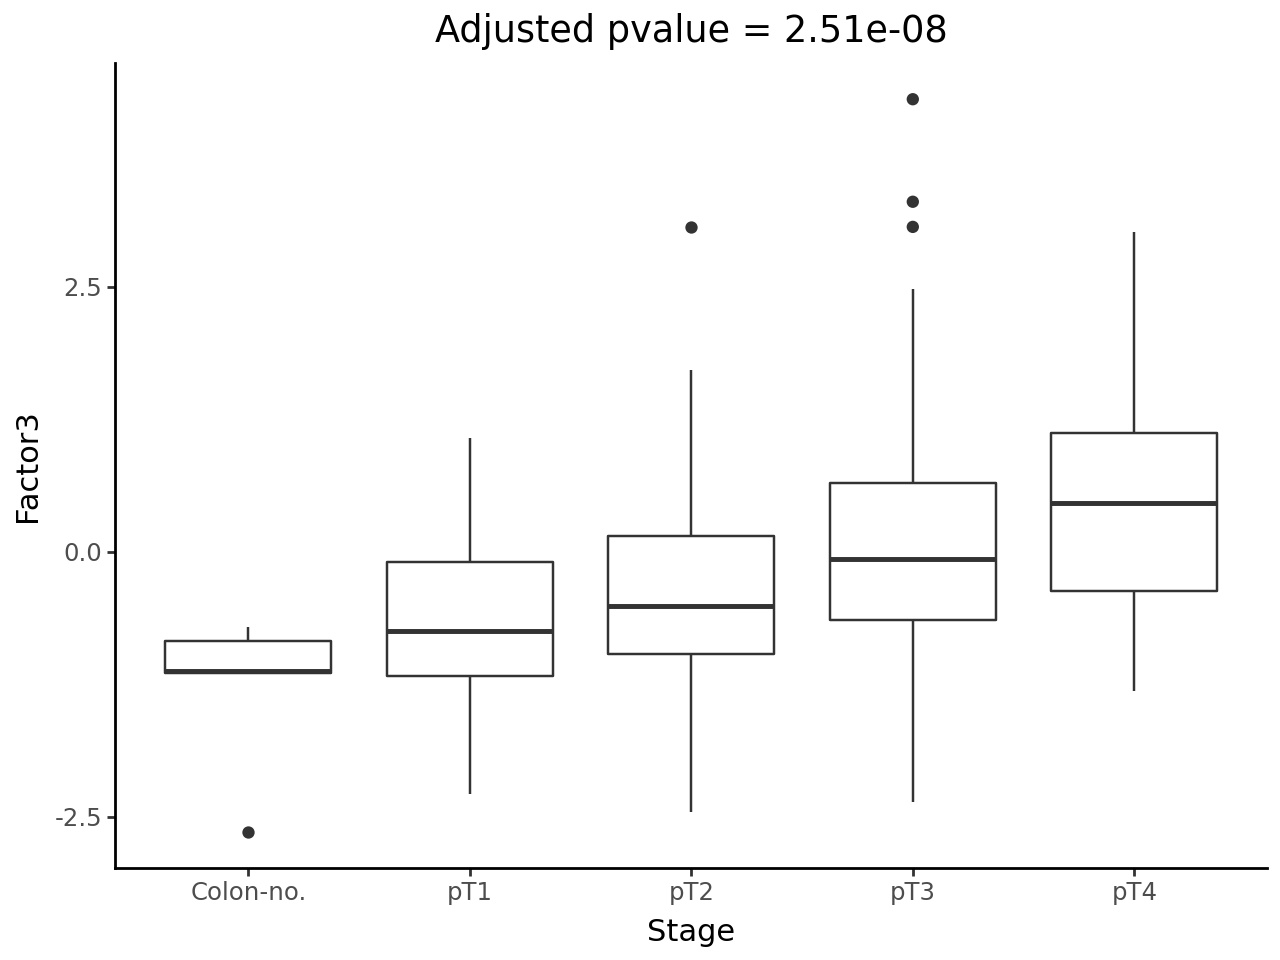

In [34]:
ggplot(factor_scores, aes(y='Factor3', x='Stage')) + geom_boxplot() + theme_classic() + ggtitle("Adjusted pvalue = 2.51e-08")

### Test "MUVIcell"

In [35]:
import muvi

In [36]:
device = "cpu"
try:
    device = f"cuda:{muvi.get_free_gpu_idx()}"
except Exception as e:
    print(e)

In [37]:
model = muvi.tl.from_mdata(
    features,
    # view_names=["rna", "atac"],
    n_factors=10,
    nmf=True,
    device=device,
)
model

2025-02-05 17:08:02,822 - muvi.core.models - WARNING - No view names provided!
2025-02-05 17:08:02,822 - muvi.core.models - INFO - Setting the view names to the sorted list of dictonary keys in observations.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - Storing the index of the view `CD4_lymphocyte` as sample names.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,824 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,825 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,825 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,825 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:08:02,825 - muvi.core.models - INFO - pd.DataFrame detected.
2

|=================================================================================================================================================================================================================|
|                                                                                               MuVI version 0.2.0                                                                                                |
|=================================================================================================================================================================================================================|
| Parameter        | Value                                                                                                                                                                                        |
|------------------|------------------------------------------------------------------------------------------------------------------------------------

In [38]:
model.fit(seed=0)

2025-02-05 17:08:03,742 - muvi.core.models - INFO - Using 2 particles in parallel.
2025-02-05 17:08:03,743 - muvi.core.models - INFO - Preparing model and guide...
2025-02-05 17:08:03,743 - muvi.core.models - WARNING - No prior feature sets provided, running model uninformed.
2025-02-05 17:08:03,752 - muvi.core.models - INFO - Preparing optimizer...
2025-02-05 17:08:03,753 - muvi.core.models - INFO - Decaying learning rate over 10000 iterations.
2025-02-05 17:08:03,753 - muvi.core.models - INFO - Preparing SVI...
2025-02-05 17:08:03,753 - muvi.core.models - INFO - Preparing training data...
2025-02-05 17:08:03,753 - muvi.core.models - INFO - Using complete dataset.
2025-02-05 17:08:03,754 - muvi.core.models - INFO - Setting training seed to `0`.
2025-02-05 17:08:03,754 - muvi.core.models - INFO - Cleaning parameter store.
2025-02-05 17:08:03,754 - muvi.core.models - INFO - Starting training...


  0%|          | 0/10000 [00:00<?, ?it/s]

2025-02-05 17:08:03,779 - root - INFO - Guessed max_plate_nesting = 3


 10%|█         | 1046/10000 [00:40<05:50, 25.52it/s, ELBO=207]

Relative improvement of -0.0004828 < 1e-05 for 10 step(s) in a row, stopping early.
2025-02-05 17:08:44,744 - muvi.core.models - INFO - Call `model._training_log` to inspect the training progress.


2025-02-05 17:08:44,747 - muvi.tools.utils - WARNING - Cache has not yet been setup, initialising model cache.


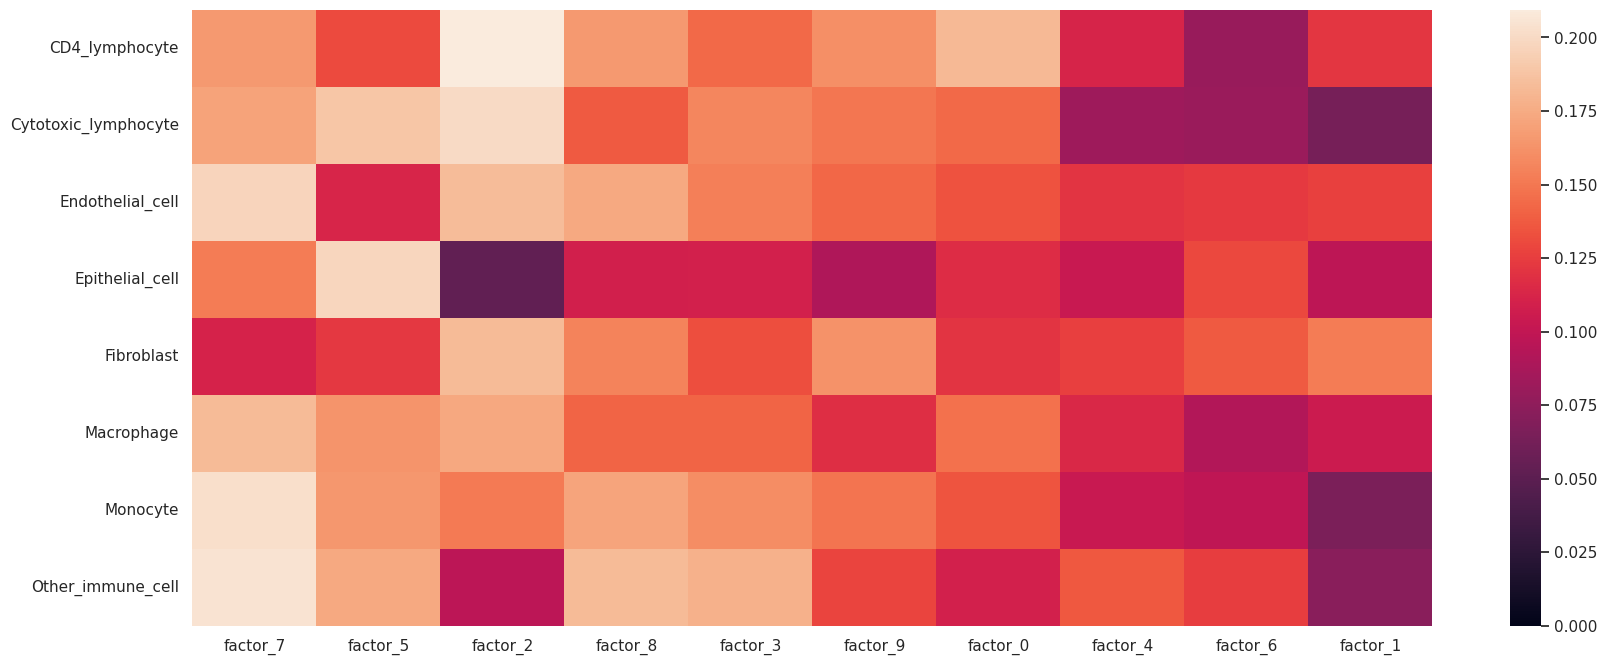

<Axes: >

In [39]:
muvi.tl.variance_explained(model)
muvi.pl.variance_explained(model)

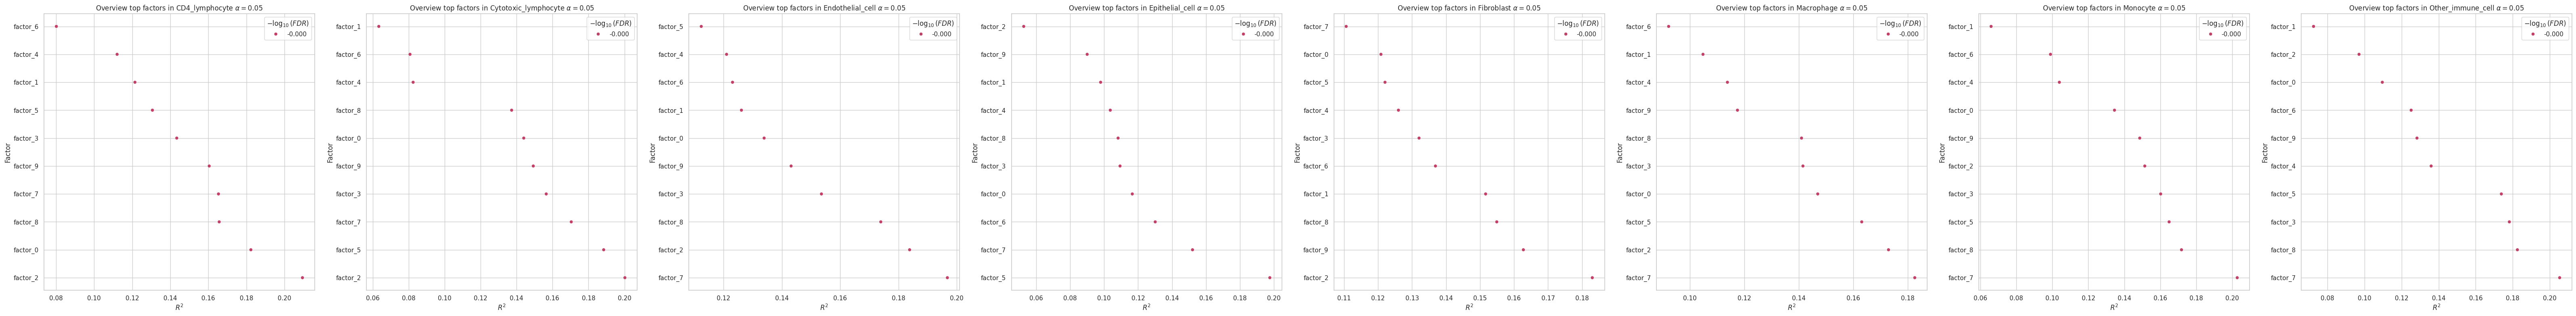

(<Figure size 6400x800 with 8 Axes>,
 array([[<Axes: title={'center': 'Overview top factors in CD4_lymphocyte $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Cytotoxic_lymphocyte $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Endothelial_cell $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Epithelial_cell $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Fibroblast $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Macrophage $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Monocyte $\\alpha = 0.05$'}, xlabel='$R^2$', ylabel='Factor'>,
         <Axes: title={'center': 'Overview top factors in Other_immune_cell $\\

In [40]:
muvi.pl.factors_overview(model)

In [67]:
# Get factor loading per modality and feature
all_loadings = model.get_factor_loadings(model.view_names, model.factor_names, as_df=True)

# We can get the mudata order by iterating over the modality names
assert np.all(np.hstack([features.mod[m].var_names.to_list() for m in features.mod]) == features.var_names.to_numpy())

# Format factor loadings for all features, ensure that the order is the same as in the mudata
all_loadings_sorted = [np.transpose(all_loadings[m]).loc[:,[f"factor_{i}" for i in range(all_loadings["CD4_lymphocyte"].shape[0])]]
                       for m in features.mod]
assert np.all(np.hstack([x.index for x in all_loadings_sorted]) == features.var_names.to_numpy())

# Store with mudata
features.varm["MuVI"] = np.vstack(all_loadings_sorted)
# Beware that the order of the factors is not the same as in the figures above

In [68]:
variable_loadings = li.ut.get_variable_loadings(features, varm_key='MuVI') # get loadings

# Add cell type (view) to the variable loadings
variable_loadings['view'] = ''
for view in features.mod.keys():
    variable_loadings.loc[np.arange(len(features.varm[view]))[features.varm[view]],"view"] = view
    
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False) # Default
variable_loadings.head()

index   Factor1   Factor2   Factor3  \
141  juxtaview.40_l.Cancer_cell_Cancer_cell  1.070036  0.482821  0.348723   
27                             eccentricity  0.836930  0.731188  0.652509   
200                              proportion  0.728519  0.000000  0.000000   
225                              proportion  0.718313  0.000000  0.000000   
222                        eccentricity_std  0.706747  0.483291  0.261992   

      Factor4   Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  \
141  0.725845  0.765190  0.600809  0.901932  0.897359  0.612681  0.783602   
27   1.209962  0.907024  0.466137  0.928392  1.308943  0.816717  0.958618   
200  0.124402  0.020086  0.271279  0.000000  0.000000  0.124707  0.000000   
225  0.000000  0.000000  0.000000  0.000000  0.017272  0.252688  0.000000   
222  0.931063  0.741170  0.404234  0.698615  0.917038  0.382769  0.776058   

                     view  
141       Epithelial_cell  
27      Other_immune_cell  
200              Monocyte  
225  Cytotoxic_lymphocyte  
222              Monocyte

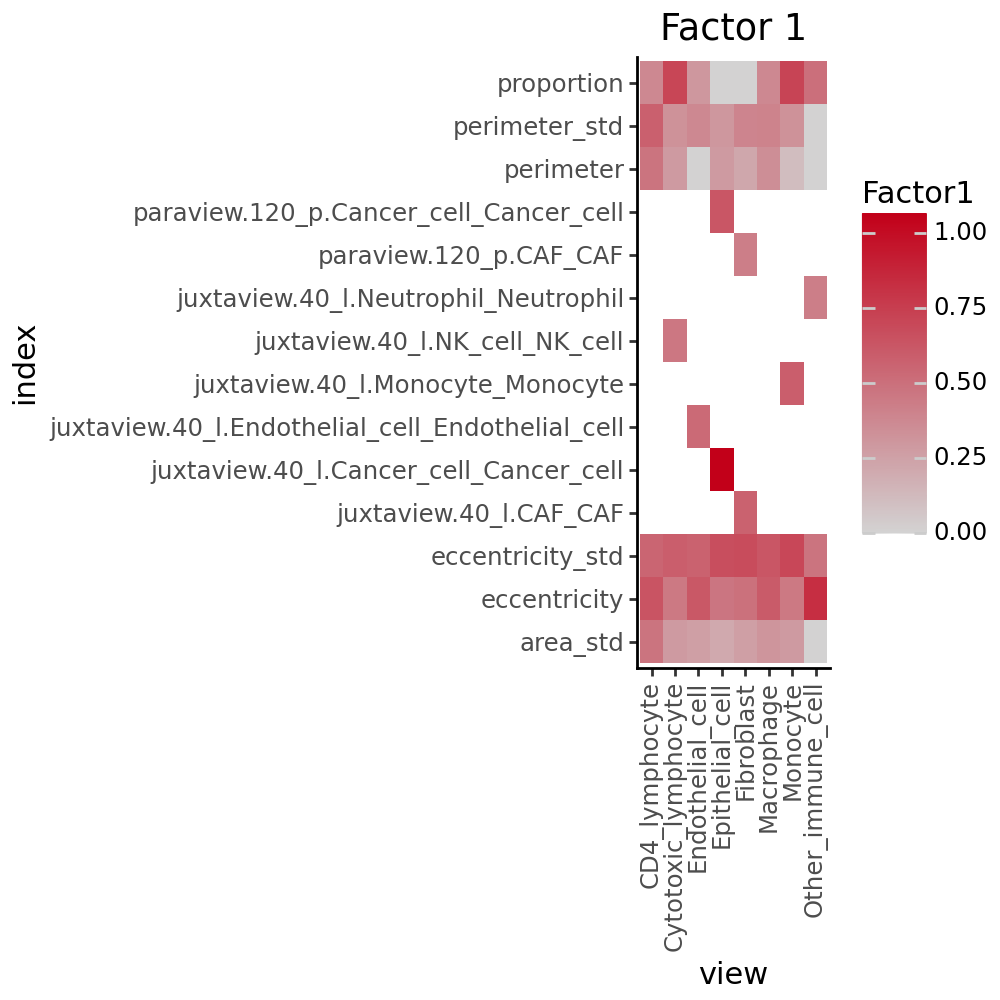

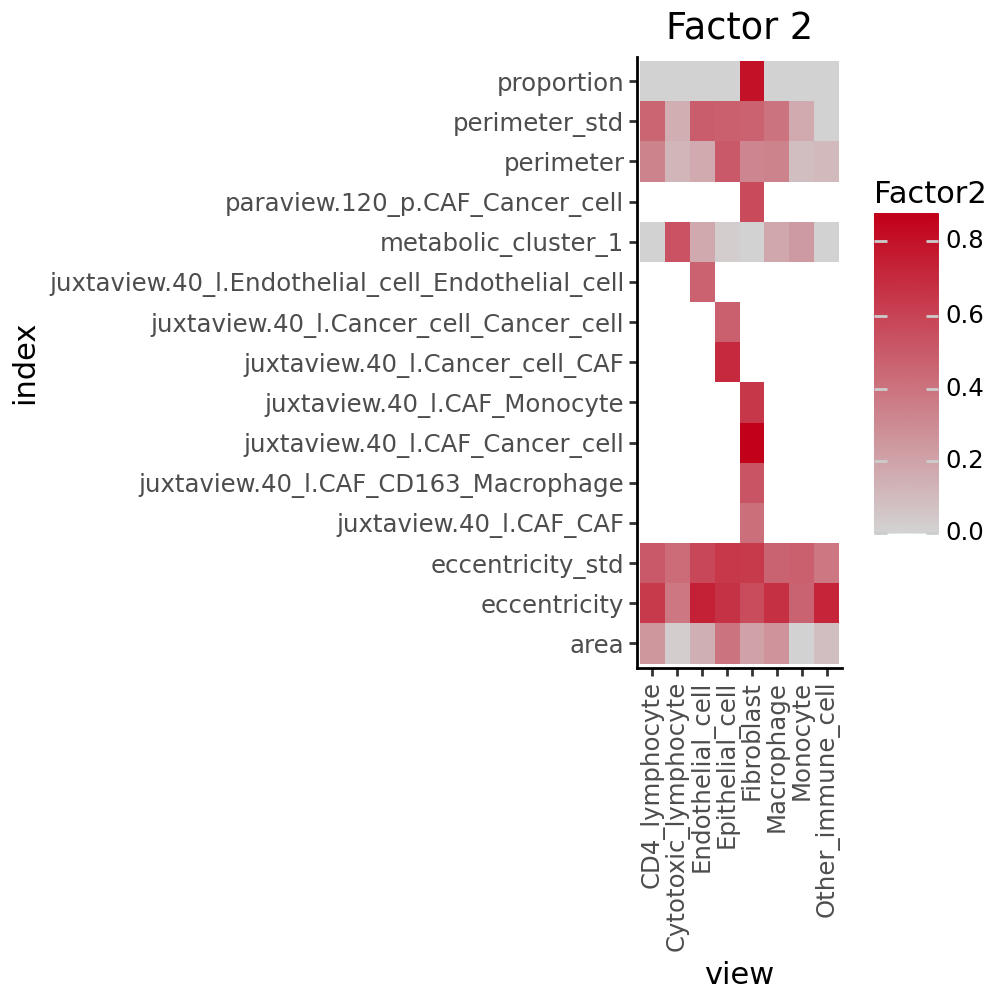

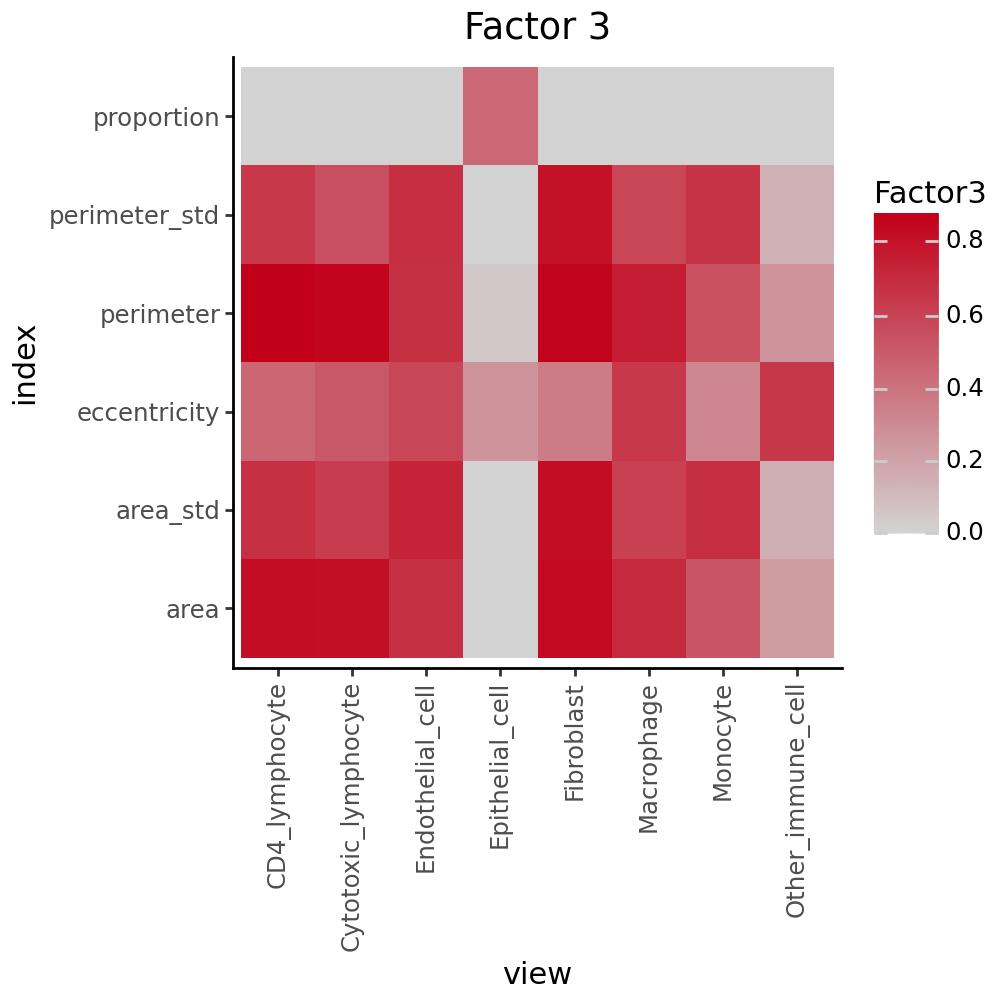

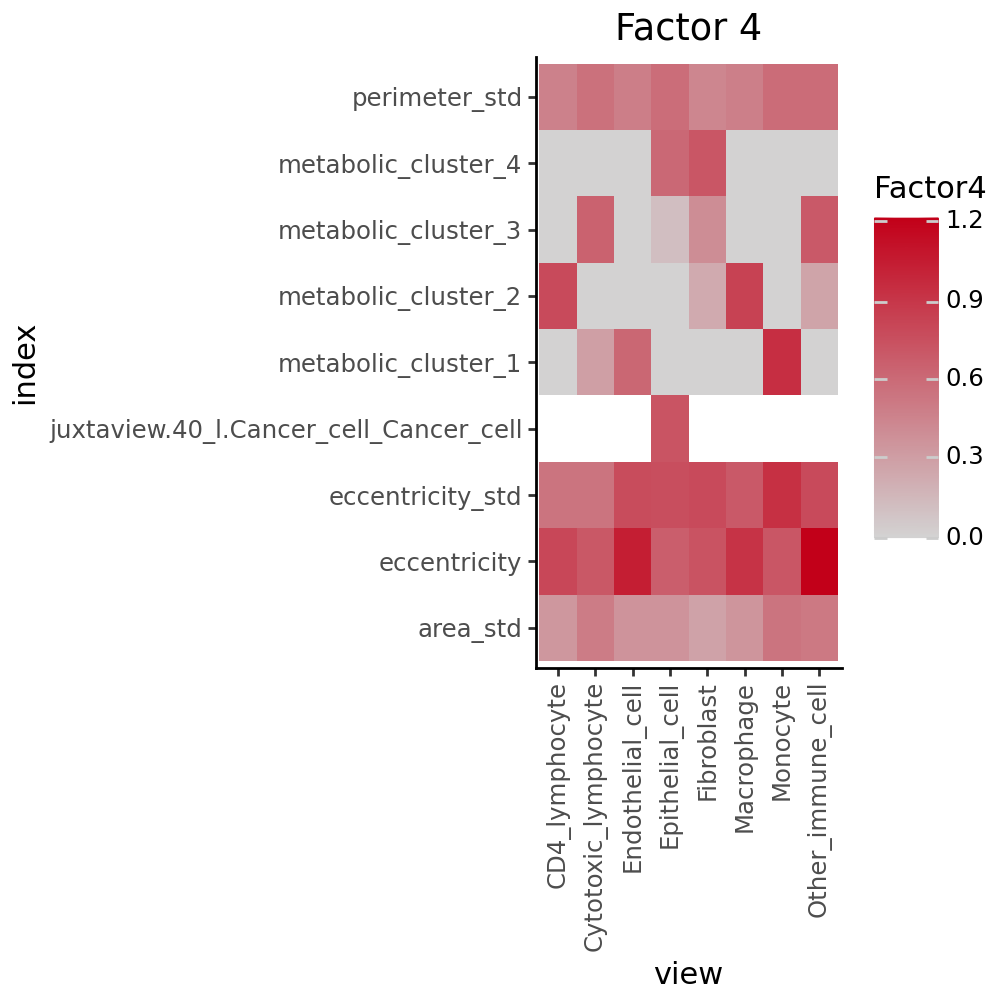

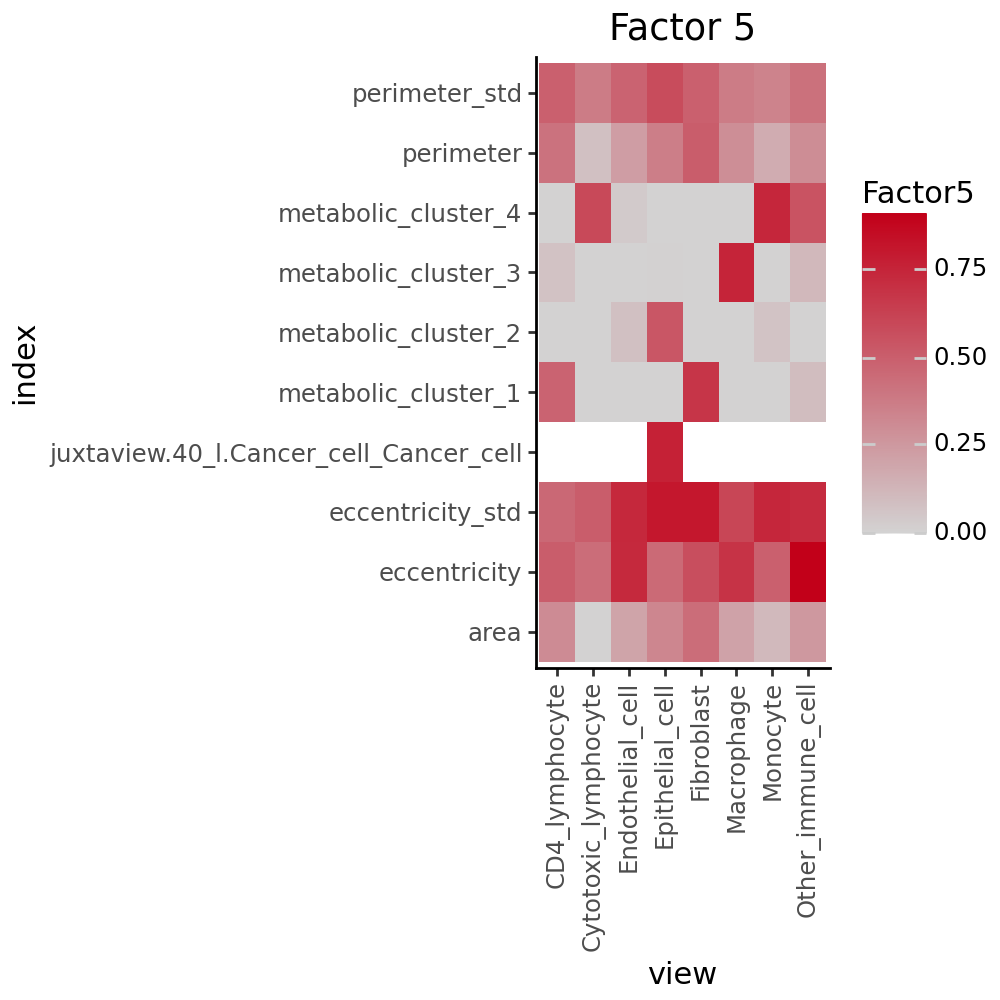

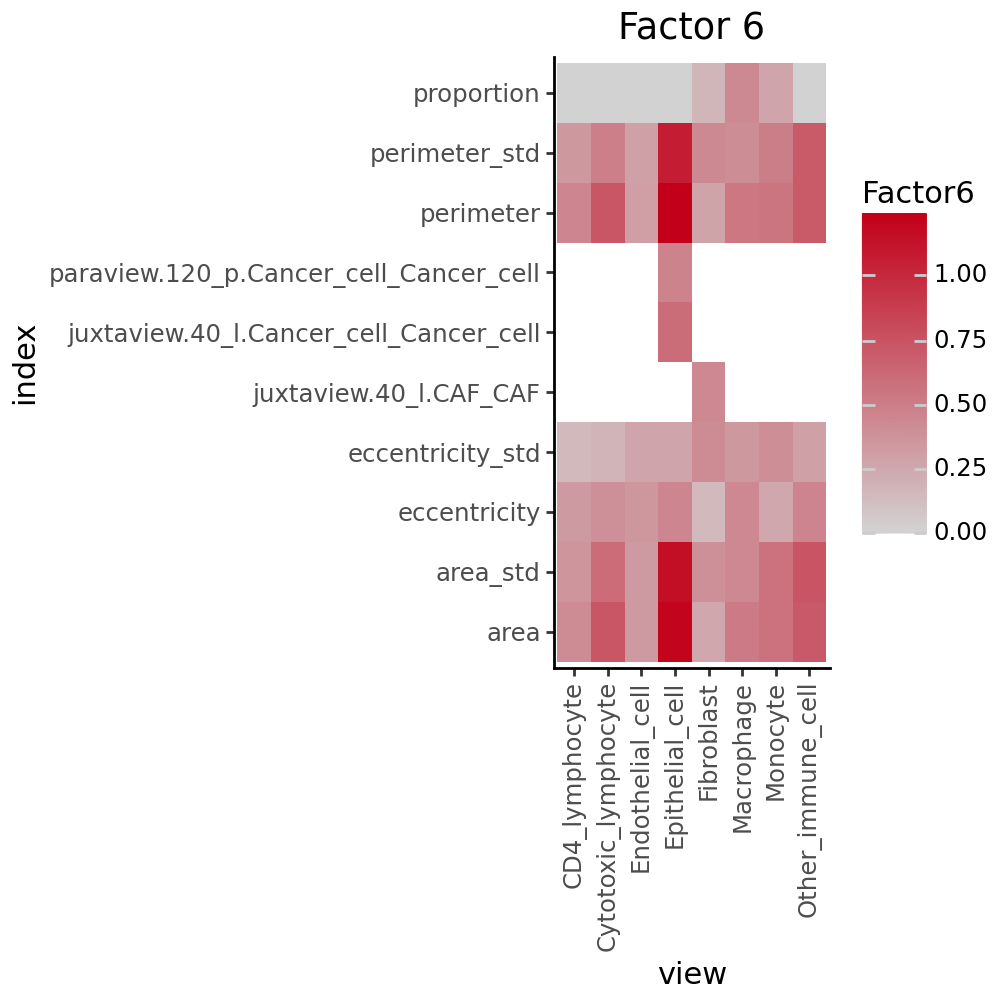

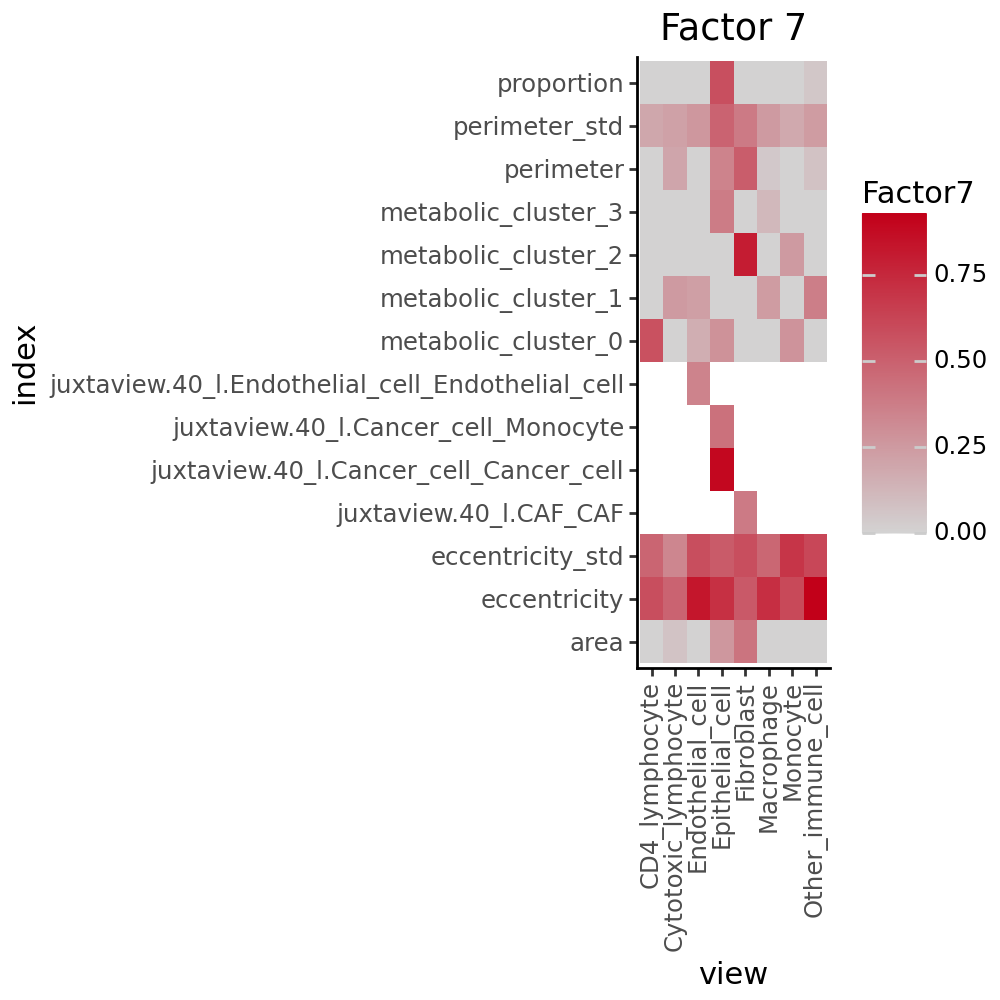

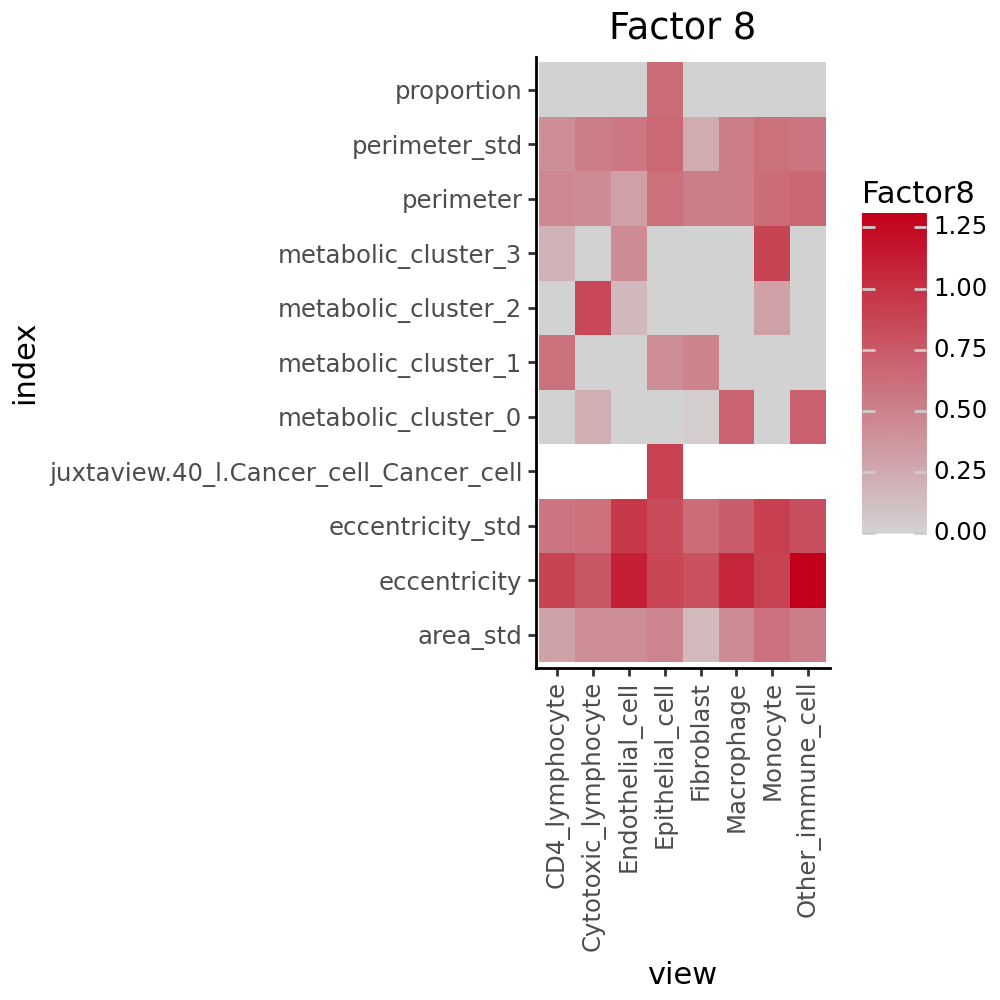

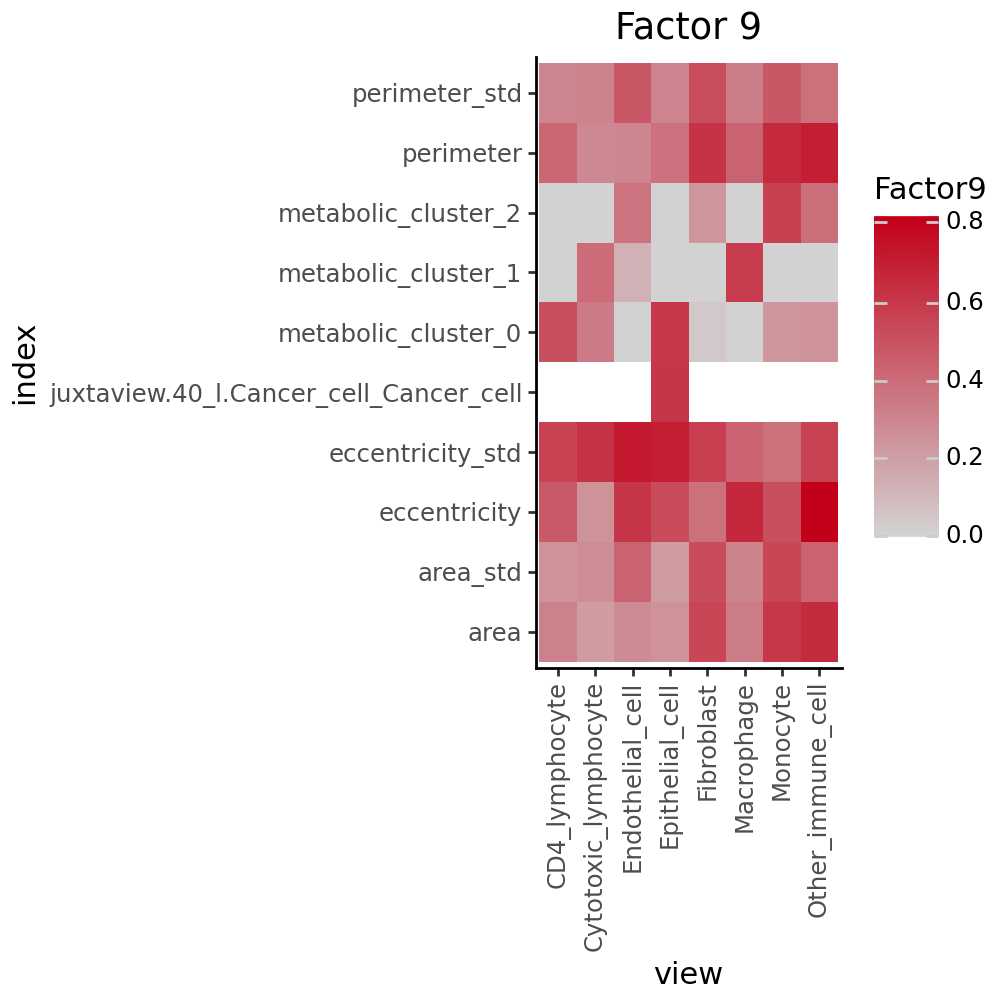

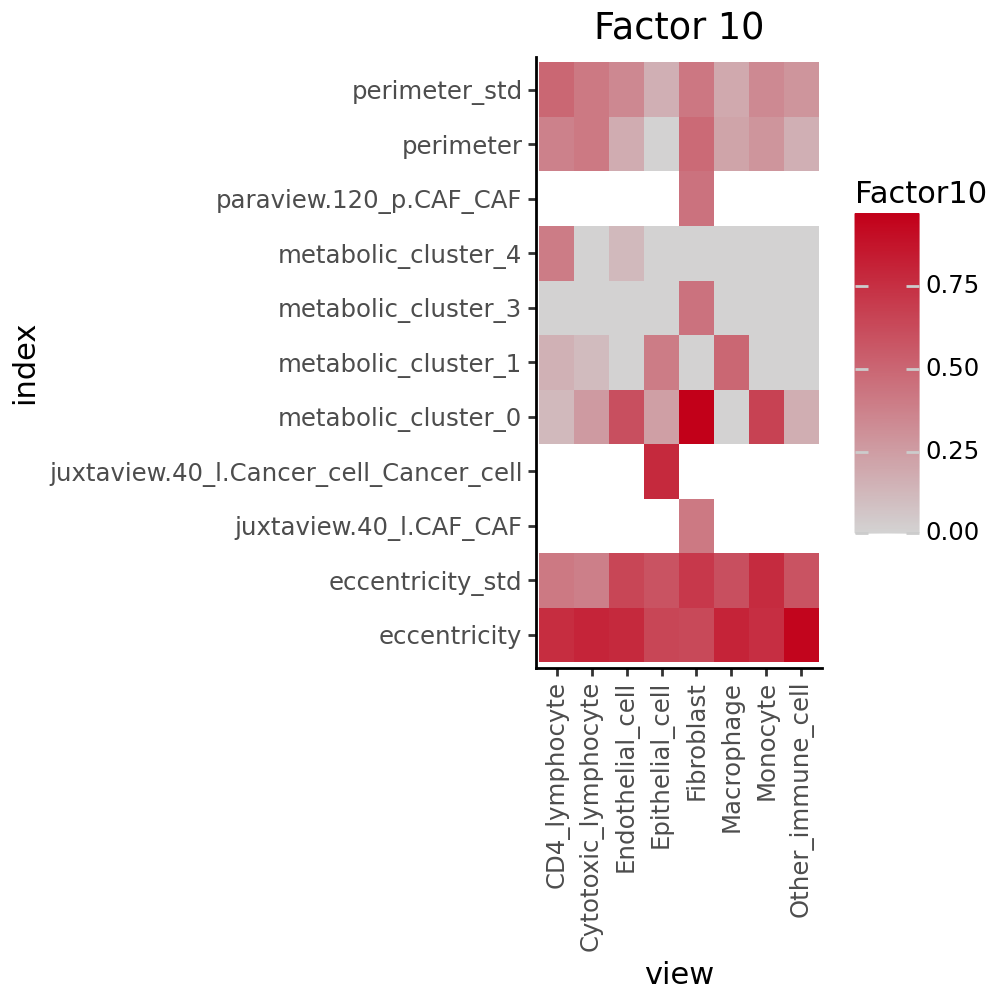

In [69]:
# get top genes with highest absolute loadings across all views
top_genes = variable_loadings['index'].head(30)
top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

for fnum in range(1, top_loadings.shape[1] - 1):
    variable_loadings = variable_loadings.sort_values(by=f'Factor{fnum}', key=lambda x: abs(x), ascending=False) # Default
    top_genes = variable_loadings['index'].head(30)
    top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]

    # plot them
    # dotplot of variable, view, loadings
    gp = (ggplot(top_loadings) +
        ggtitle(f"Factor {fnum}") +
        aes(x='view', y='index', fill=f'Factor{fnum}') +
        geom_tile() +
        scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
        theme_classic() +
        theme(axis_text_x=element_text(angle=90, hjust=0.5), figure_size=(5, 5))
    )
    gp.show()

In [70]:
features.obsm["X_muvi"] = model.get_factor_scores()

In [73]:
# obtain factor scores
factor_scores = li.ut.get_factor_scores(features, obsm_key='X_muvi', obs_keys=['Stage'])
factor_scores.head()

index   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0   A1a  0.000000  0.000000  0.000000  0.000000  2.187318  0.000000  0.314515   
1   A1c  0.000000  0.584951  0.823255  0.083142  0.241098  0.000000  0.372451   
2   A1d  0.000000  0.629099  0.650946  0.498812  1.049739  0.000000  0.000000   
3   A1e  0.294863  0.000000  0.000000  1.278358  0.264494  0.319958  0.490584   
4   A1f  0.000000  0.376481  0.431946  0.825530  1.160729  0.000000  0.000000   

    Factor8   Factor9  Factor10 Stage  
0  0.000000  0.861518  0.298099   pT3  
1  0.783098  1.776111  0.102371   pT4  
2  0.142562  1.805010  0.000000   pT3  
3  0.000000  1.179450  0.666940   pT4  
4  0.000000  1.711247  0.000000   pT1

In [74]:
# Kruksal Wallis test for factor 1 and stage
from scipy.stats import kruskal
for fnum in range(1, top_loadings.shape[1] - 1):
    factor1 = factor_scores[f'Factor{fnum}']
    stage = factor_scores['Stage']
    print(kruskal(factor1[stage == 'pT1'], factor1[stage == 'pT2'], factor1[stage == 'pT3'], factor1[stage == 'pT4'], factor1[stage == 'Colon-no.']))
    # Note: multiply by 10 for Bonferroni correction

KruskalResult(statistic=12.021237087244888, pvalue=0.017194037553156797)
KruskalResult(statistic=10.758857175650142, pvalue=0.029412072563374646)
KruskalResult(statistic=2.517646174623306, pvalue=0.6414787842977117)
KruskalResult(statistic=20.23180654149374, pvalue=0.00044943179055893925)
KruskalResult(statistic=2.749853213600166, pvalue=0.600519555763753)
KruskalResult(statistic=16.90058735922608, pvalue=0.0020208281802231868)
KruskalResult(statistic=9.553873033870762, pvalue=0.048651969451250686)
KruskalResult(statistic=15.89186717636338, pvalue=0.003167747514755217)
KruskalResult(statistic=18.88084269634586, pvalue=0.0008294593893554334)
KruskalResult(statistic=17.41493365389366, pvalue=0.001605096400496568)


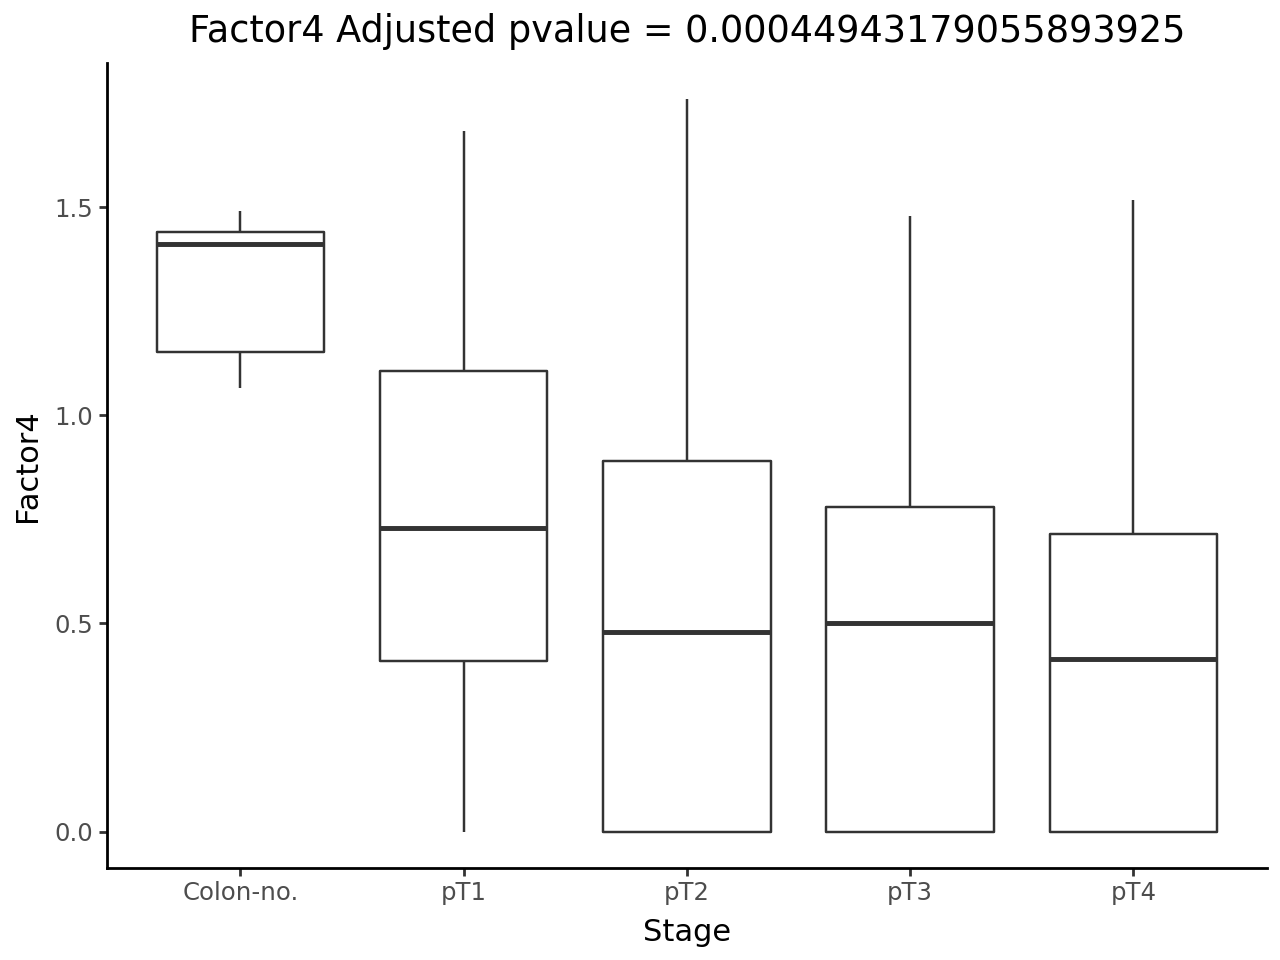

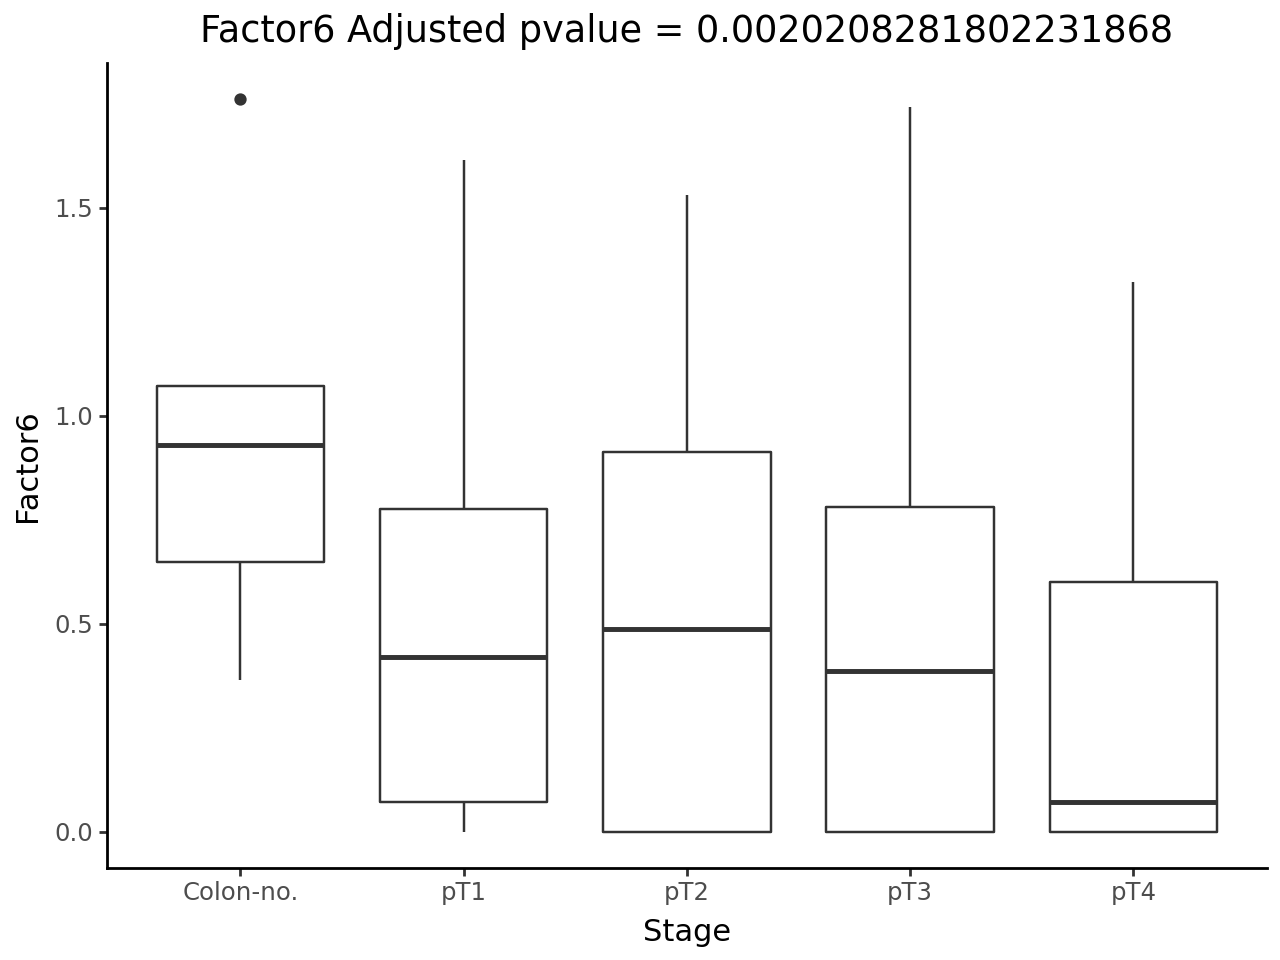

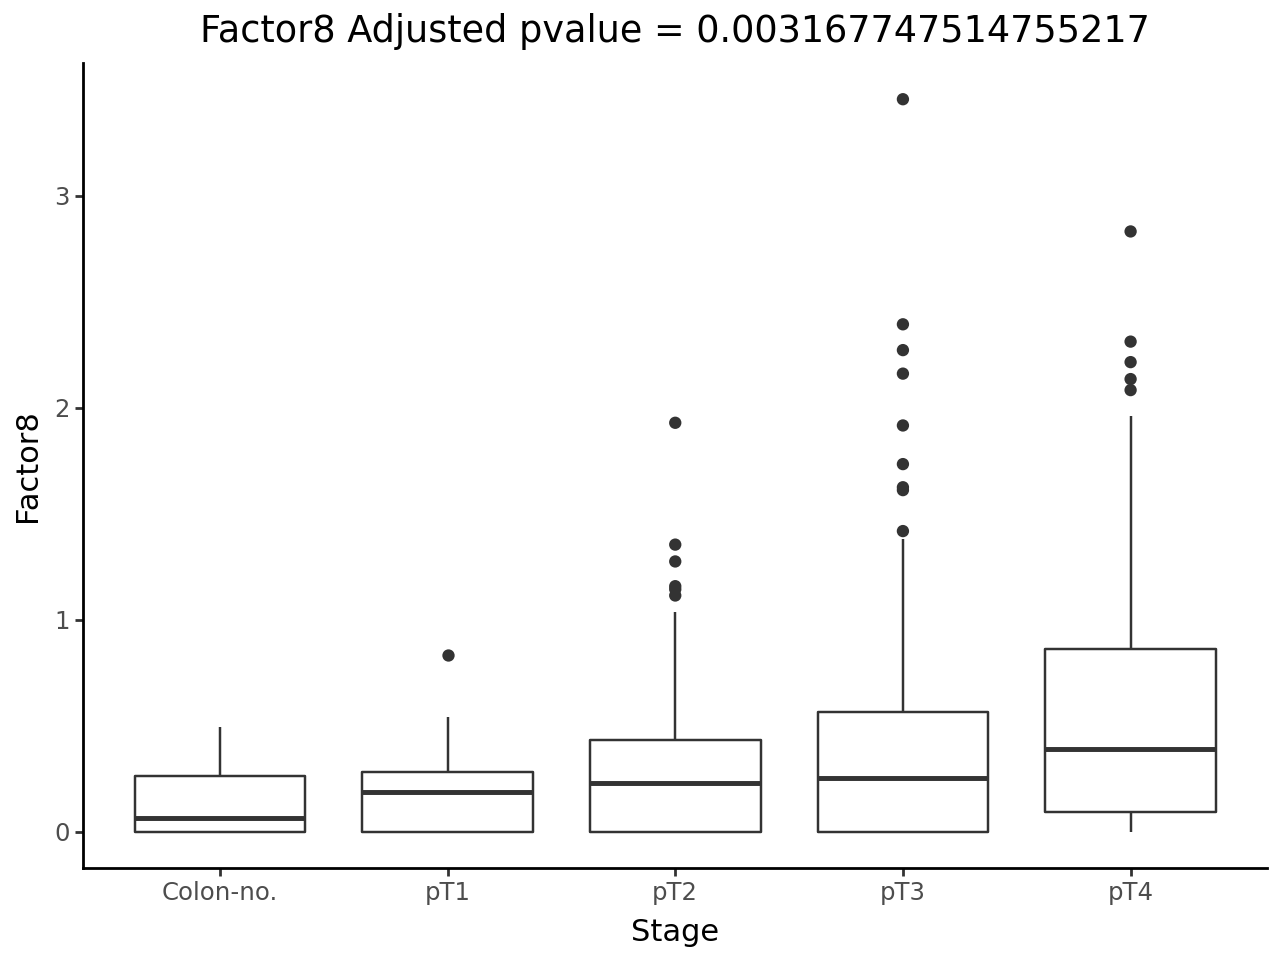

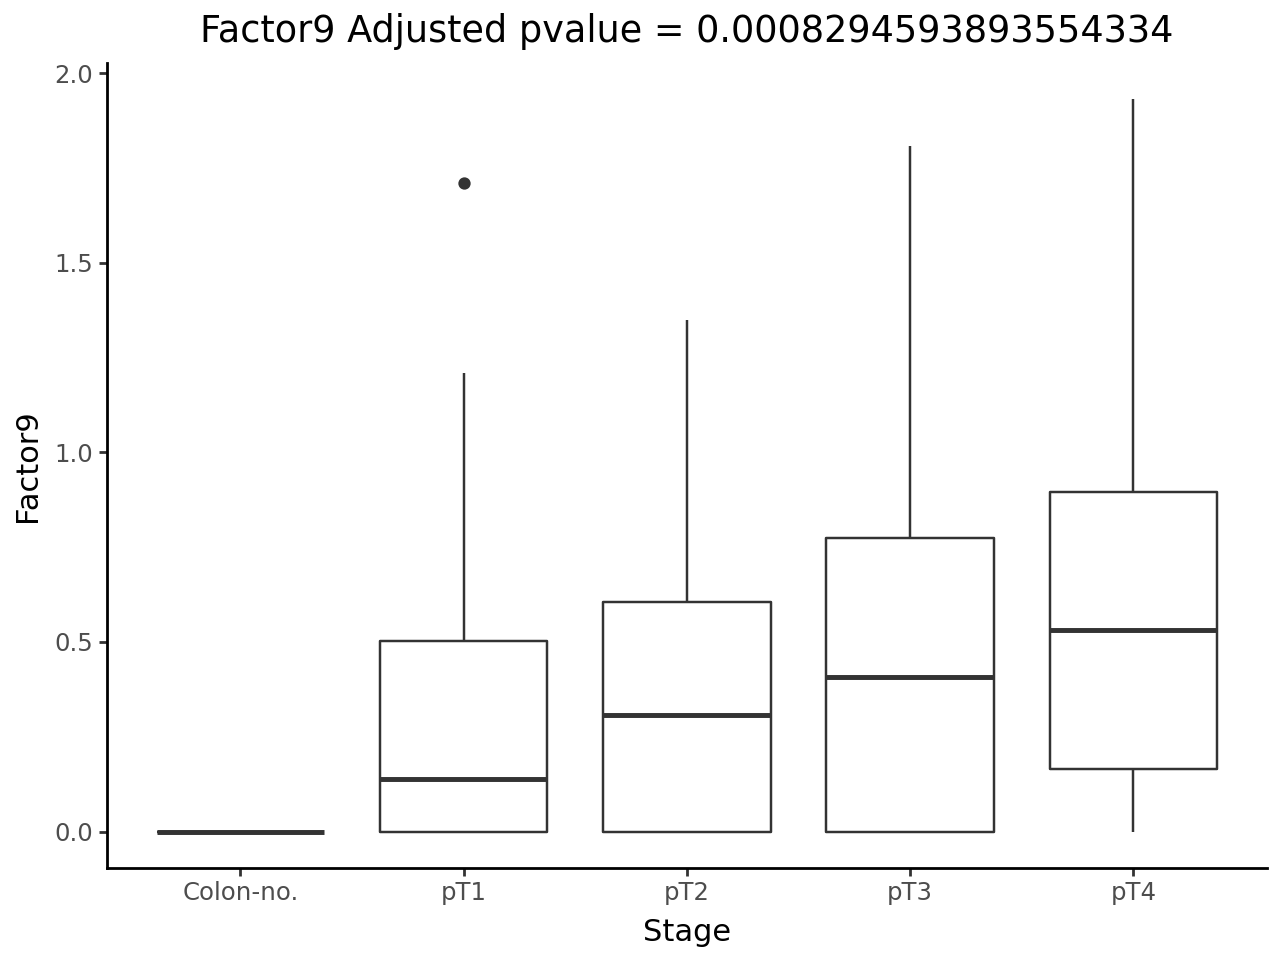

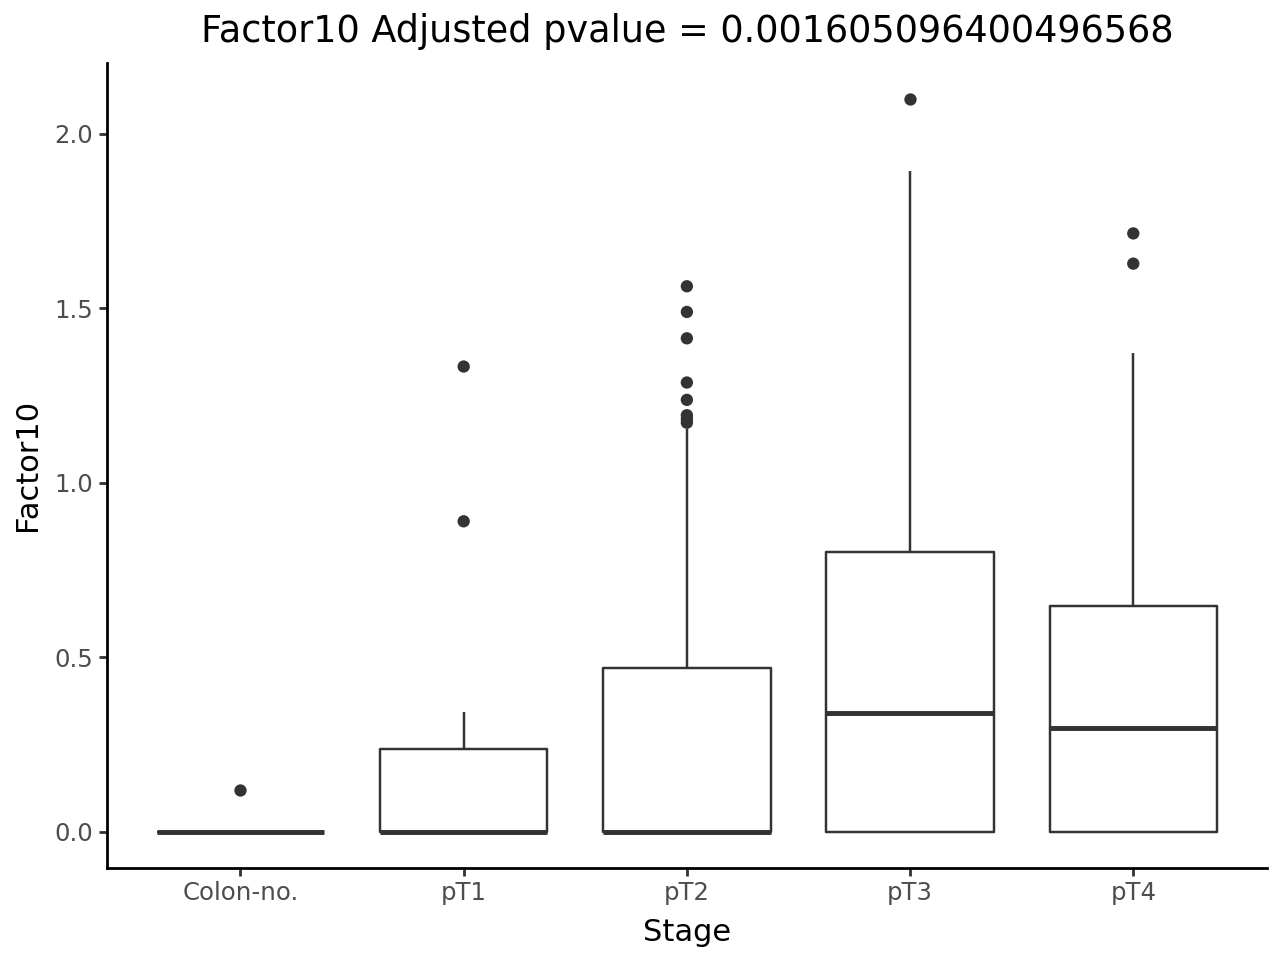

In [81]:
# Factors 4, 6, 8, 9 and 10 are associated with disease stage
for f in ["Factor4", "Factor6", "Factor8", "Factor9", "Factor10"]:
    gp = ggplot(factor_scores, aes(y=f, x='Stage')) + \
            geom_boxplot() + theme_classic() + \
            ggtitle(f + " Adjusted pvalue = " + str(kruskal(factor_scores[f][factor_scores['Stage'] == 'pT1'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT2'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT3'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT4'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'Colon-no.'])[1]))
    gp.show()

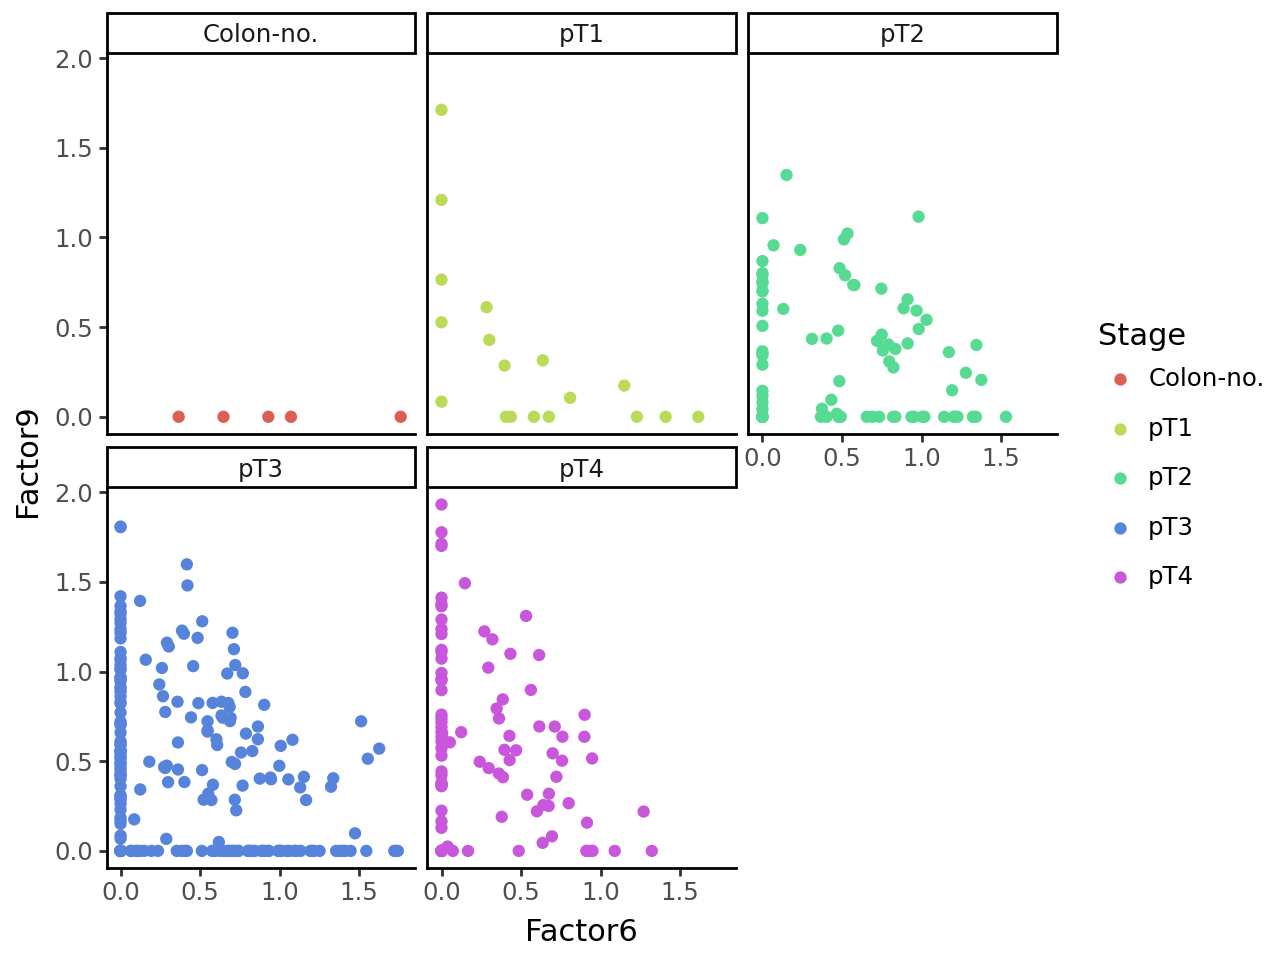

In [84]:
ggplot(factor_scores, aes(x='Factor6', y='Factor9', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

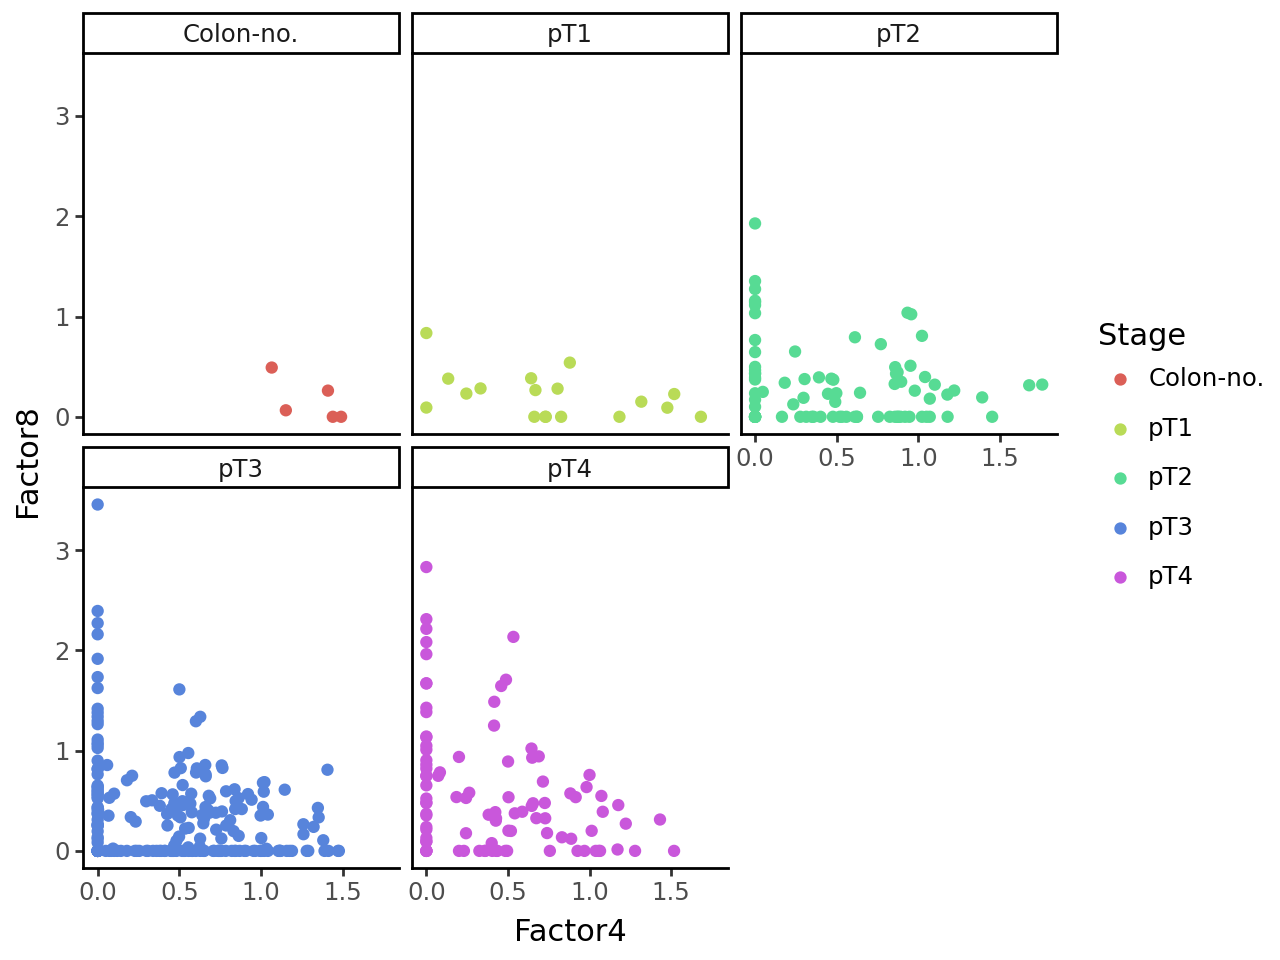

In [85]:
ggplot(factor_scores, aes(x='Factor4', y='Factor8', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

In [86]:
# Try again without enforcing non-negativity
model = muvi.tl.from_mdata(
    features,
    # view_names=["rna", "atac"],
    n_factors=10,
    nmf=False,
    device=device,
)
model

2025-02-05 17:35:16,819 - muvi.core.models - WARNING - No view names provided!
2025-02-05 17:35:16,819 - muvi.core.models - INFO - Setting the view names to the sorted list of dictonary keys in observations.
2025-02-05 17:35:16,820 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,820 - muvi.core.models - INFO - Storing the index of the view `CD4_lymphocyte` as sample names.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,821 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,822 - muvi.core.models - INFO - pd.DataFrame detected.
2025-02-05 17:35:16,822 - muvi.core.models - INFO - pd.DataFrame detected.
2

|=================================================================================================================================================================================================================|
|                                                                                               MuVI version 0.2.0                                                                                                |
|=================================================================================================================================================================================================================|
| Parameter        | Value                                                                                                                                                                                        |
|------------------|------------------------------------------------------------------------------------------------------------------------------------

In [87]:
model.fit(seed=0)

2025-02-05 17:35:34,002 - muvi.core.models - INFO - Using 2 particles in parallel.
2025-02-05 17:35:34,002 - muvi.core.models - INFO - Preparing model and guide...
2025-02-05 17:35:34,003 - muvi.core.models - WARNING - No prior feature sets provided, running model uninformed.
2025-02-05 17:35:34,012 - muvi.core.models - INFO - Preparing optimizer...
2025-02-05 17:35:34,012 - muvi.core.models - INFO - Decaying learning rate over 10000 iterations.
2025-02-05 17:35:34,012 - muvi.core.models - INFO - Preparing SVI...
2025-02-05 17:35:34,013 - muvi.core.models - INFO - Preparing training data...
2025-02-05 17:35:34,013 - muvi.core.models - INFO - Using complete dataset.
2025-02-05 17:35:34,014 - muvi.core.models - INFO - Setting training seed to `0`.
2025-02-05 17:35:34,014 - muvi.core.models - INFO - Cleaning parameter store.
2025-02-05 17:35:34,014 - muvi.core.models - INFO - Starting training...


  0%|          | 0/10000 [00:00<?, ?it/s]

2025-02-05 17:35:34,039 - root - INFO - Guessed max_plate_nesting = 3


 10%|█         | 1022/10000 [00:40<05:55, 25.26it/s, ELBO=324]

Relative improvement of -0.001101 < 1e-05 for 10 step(s) in a row, stopping early.
2025-02-05 17:36:14,473 - muvi.core.models - INFO - Call `model._training_log` to inspect the training progress.


2025-02-05 17:36:14,477 - muvi.tools.utils - WARNING - Cache has not yet been setup, initialising model cache.


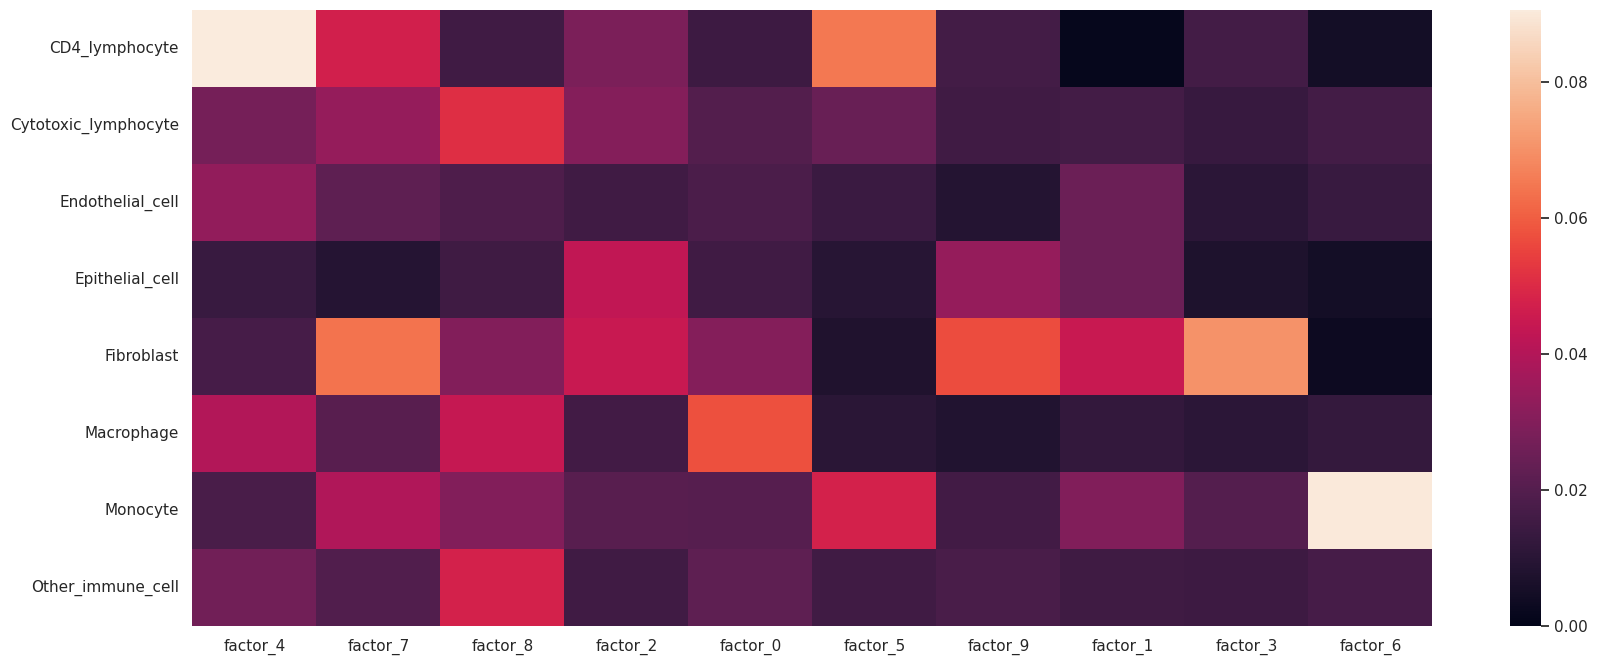

<Axes: >

In [88]:
muvi.tl.variance_explained(model)
muvi.pl.variance_explained(model)

In [89]:
# Get factor loading per modality and feature
all_loadings = model.get_factor_loadings(model.view_names, model.factor_names, as_df=True)

# We can get the mudata order by iterating over the modality names
assert np.all(np.hstack([features.mod[m].var_names.to_list() for m in features.mod]) == features.var_names.to_numpy())

# Format factor loadings for all features, ensure that the order is the same as in the mudata
all_loadings_sorted = [np.transpose(all_loadings[m]).loc[:,[f"factor_{i}" for i in range(all_loadings["CD4_lymphocyte"].shape[0])]]
                       for m in features.mod]
assert np.all(np.hstack([x.index for x in all_loadings_sorted]) == features.var_names.to_numpy())

# Store with mudata
features.varm["MuVI"] = np.vstack(all_loadings_sorted)
# Beware that the order of the factors is not the same as in the figures above

In [90]:
variable_loadings = li.ut.get_variable_loadings(features, varm_key='MuVI') # get loadings

# Add cell type (view) to the variable loadings
variable_loadings['view'] = ''
for view in features.mod.keys():
    variable_loadings.loc[np.arange(len(features.varm[view]))[features.varm[view]],"view"] = view
    
# order features by absolute value for Factor 1
variable_loadings = variable_loadings.sort_values(by='Factor1', key=lambda x: abs(x), ascending=False) # Default
variable_loadings.head()

index   Factor1   Factor2   Factor3   Factor4  \
43   juxtaview.40_l.CAF_Cancer_cell -0.607464  0.435882  0.126805 -0.078589   
200                      proportion  0.580033 -0.012093  0.289471  0.070437   
89                         area_std  0.571496  0.002214  0.036640  0.140576   
62                       proportion  0.567425  0.137037  0.265255  0.009160   
94              metabolic_cluster_3  0.523983  0.077870 -0.169038  0.039037   

      Factor5   Factor6   Factor7   Factor8   Factor9  Factor10  \
43   0.279742 -0.037801 -0.029836 -0.341799 -0.014386  0.424727   
200 -0.339241  0.109264 -0.001335  0.248846 -0.454211  0.027791   
89   0.359405 -0.024311  0.113240 -0.141550  0.369987  0.050985   
62  -0.043982  0.009505  0.097244  0.026541 -0.363487  0.068388   
94   0.021162  0.132376 -0.257458  0.029666 -0.099406 -0.089437   

               view  
43       Fibroblast  
200        Monocyte  
89       Macrophage  
62       Macrophage  
94   CD4_lymphocyte

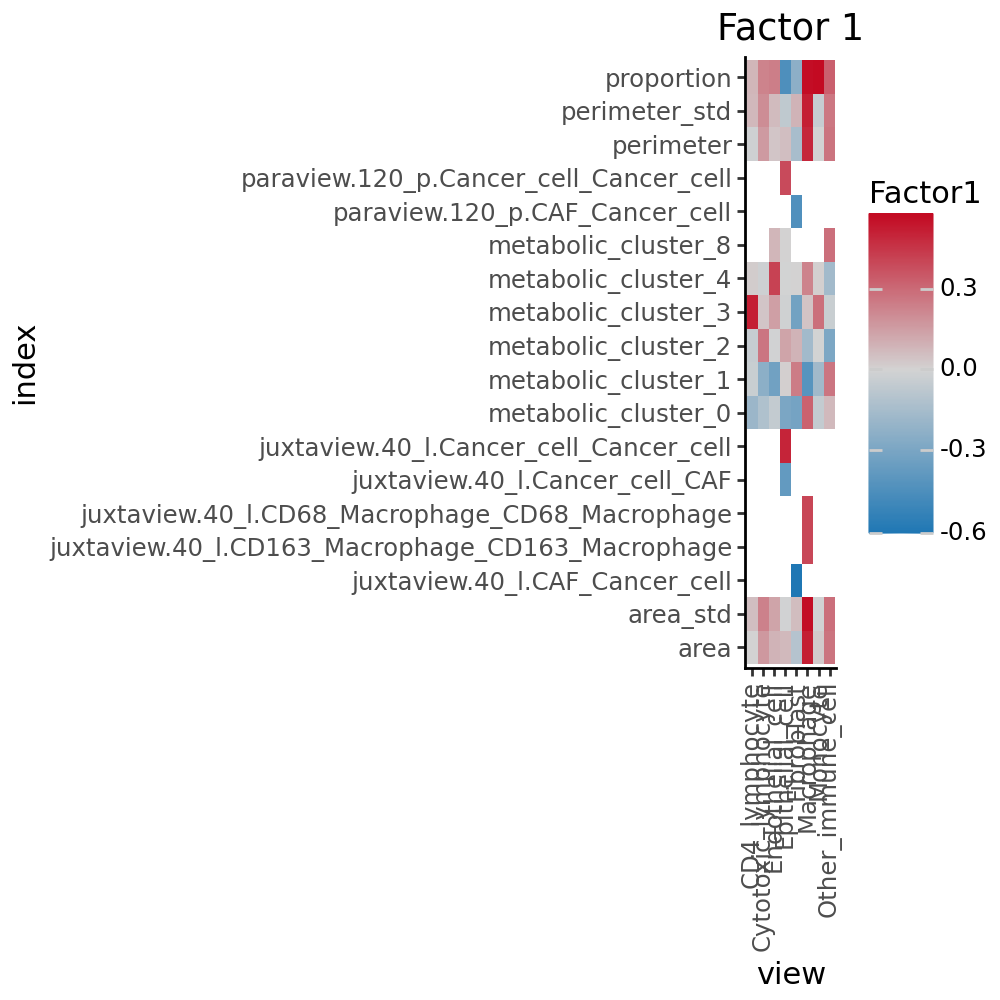

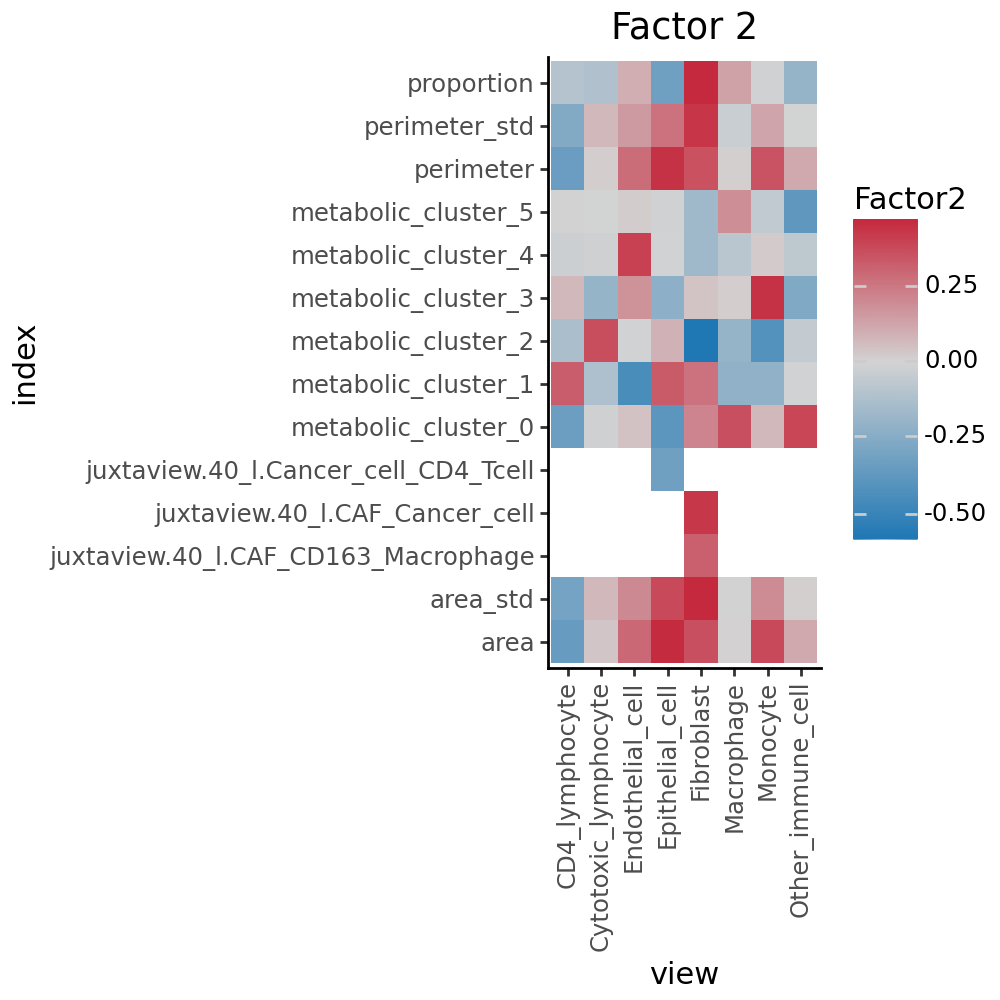

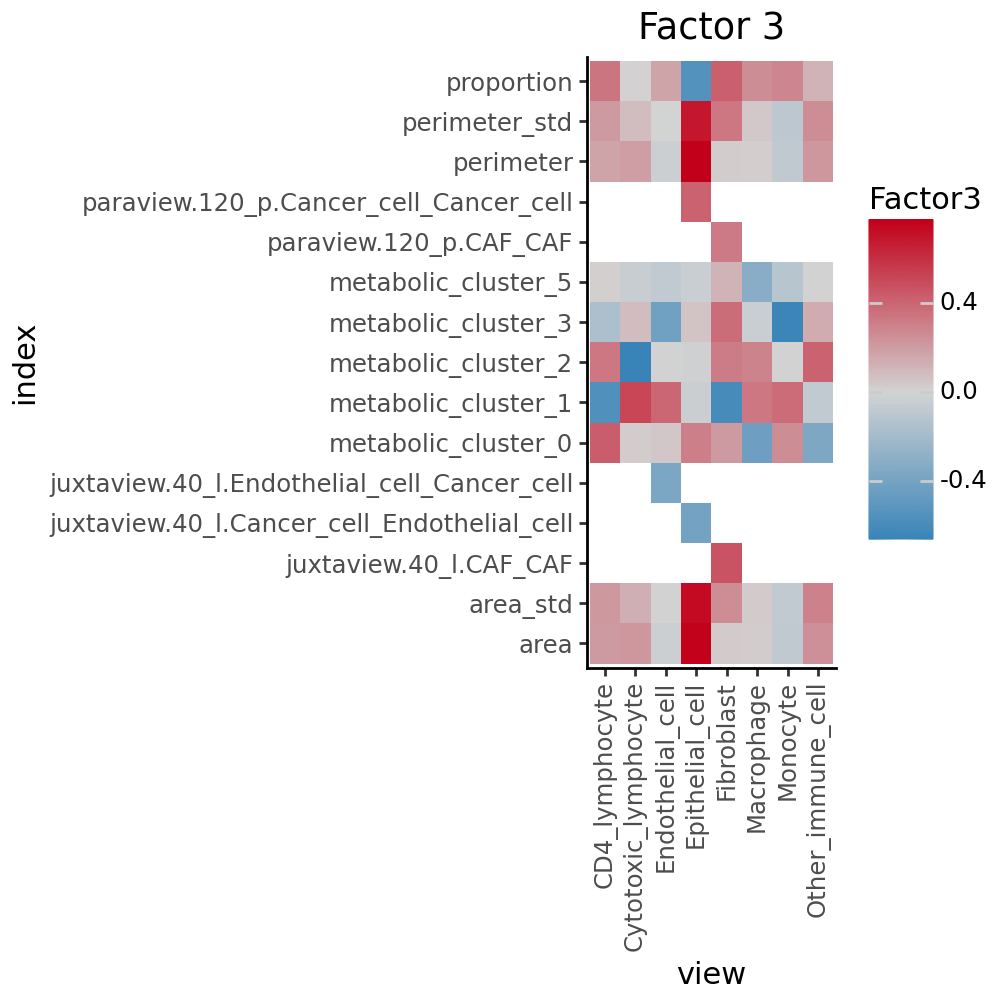

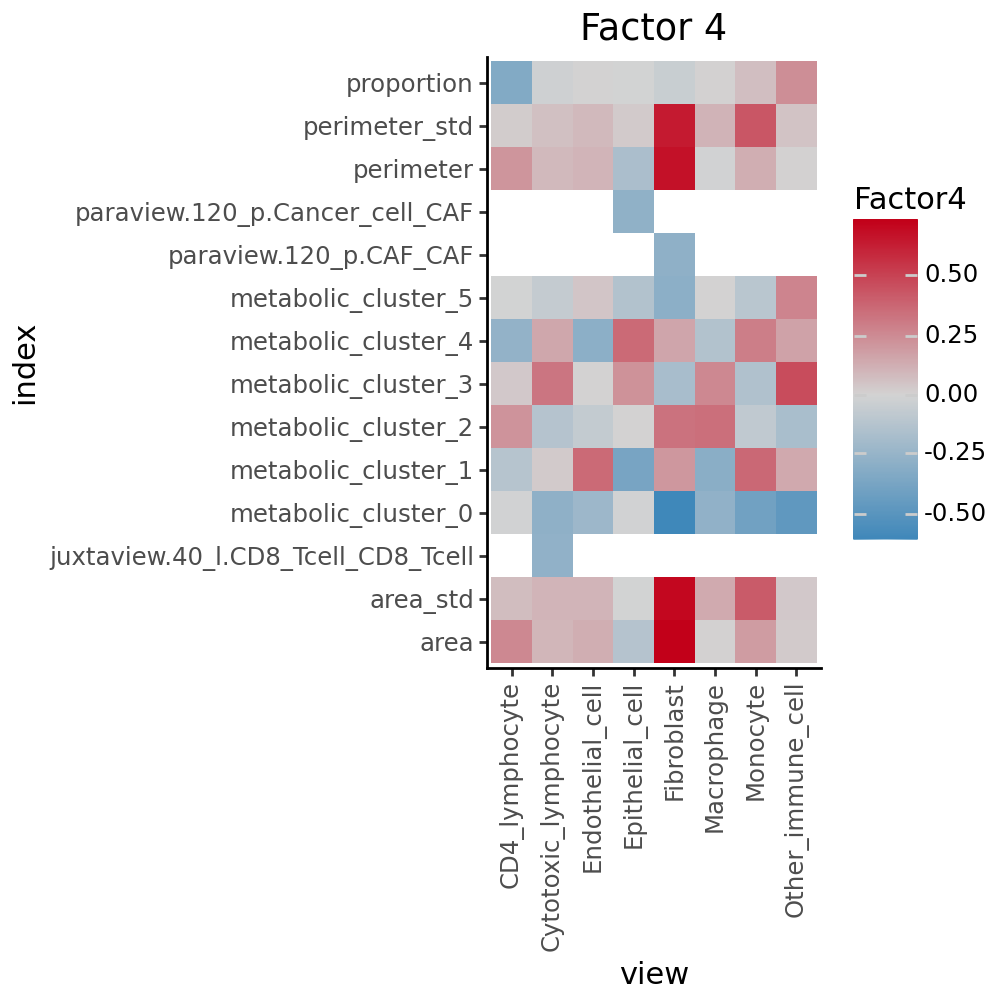

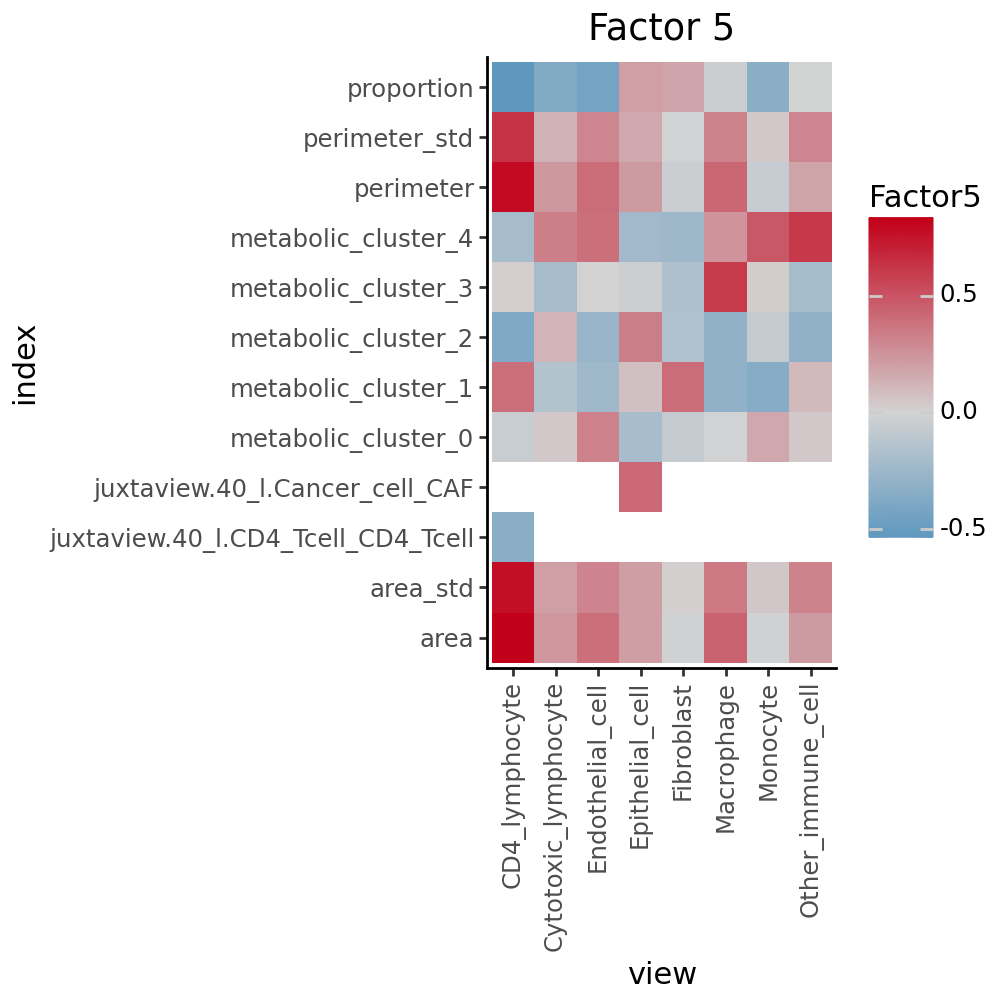

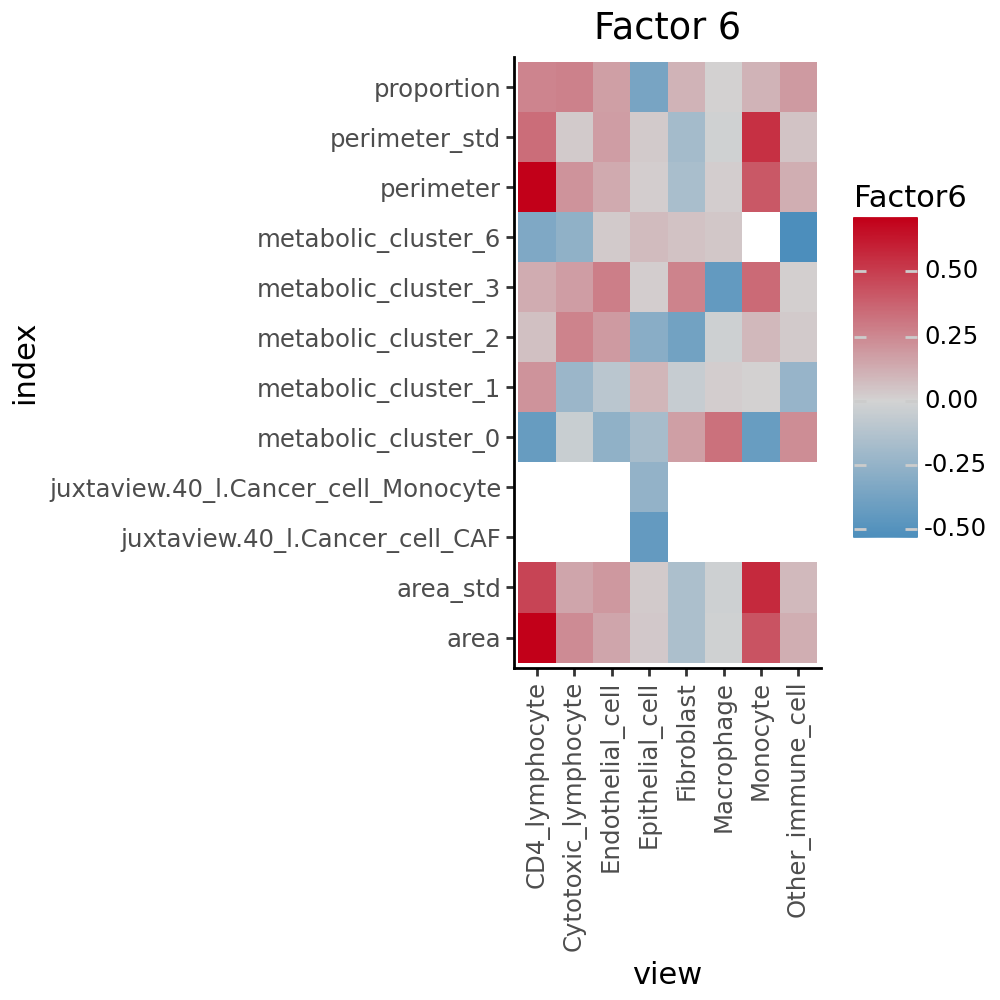

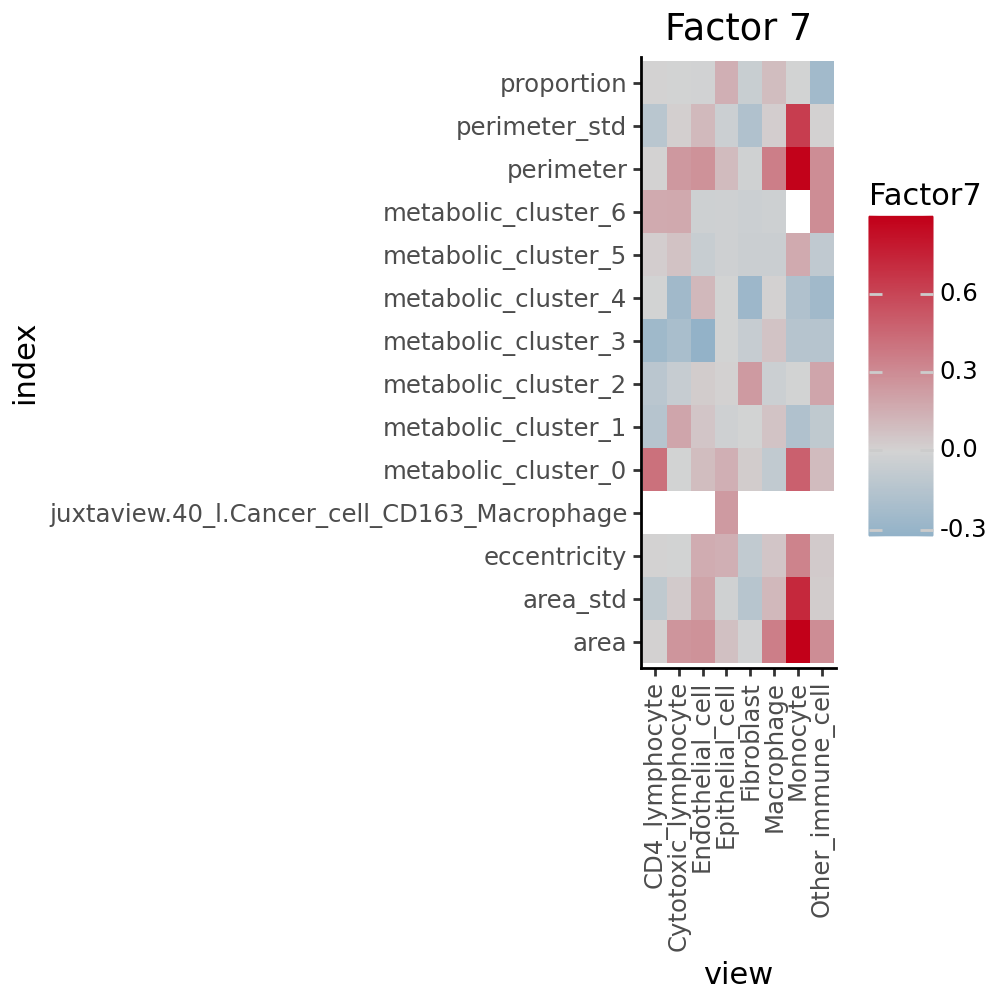

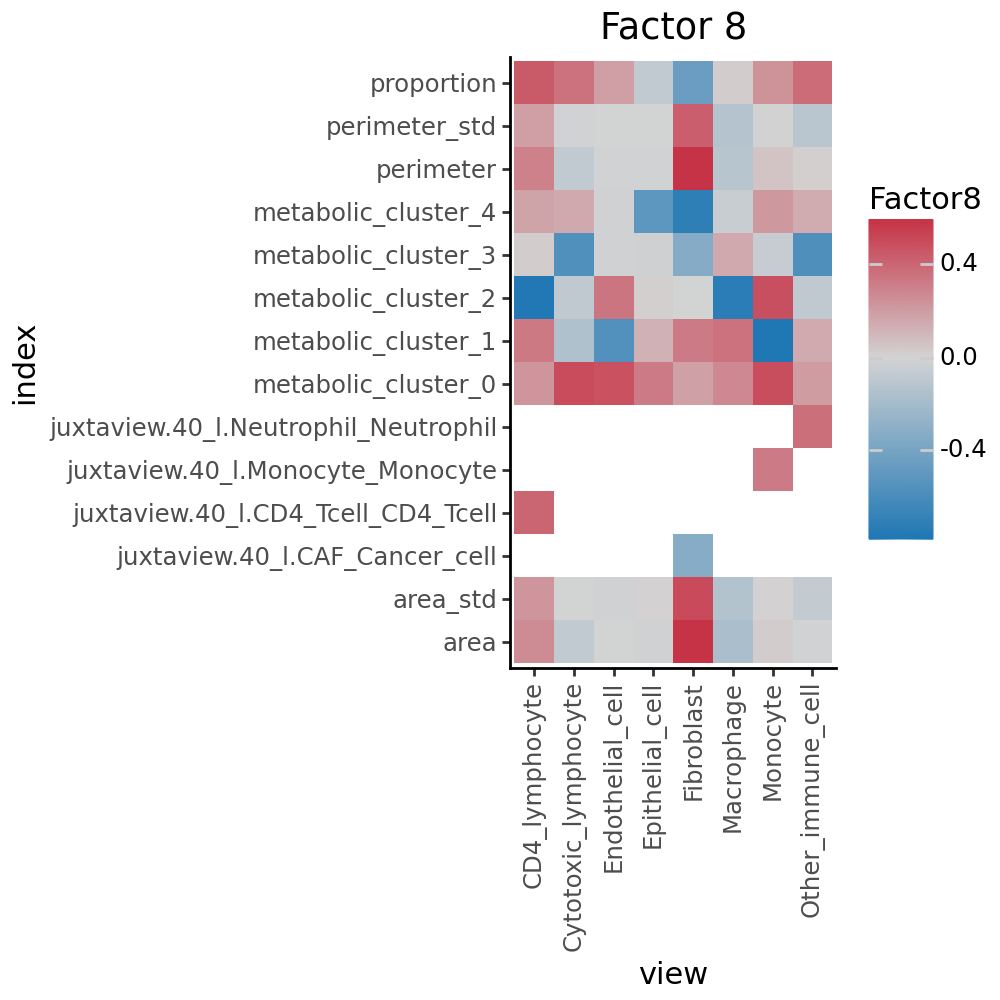

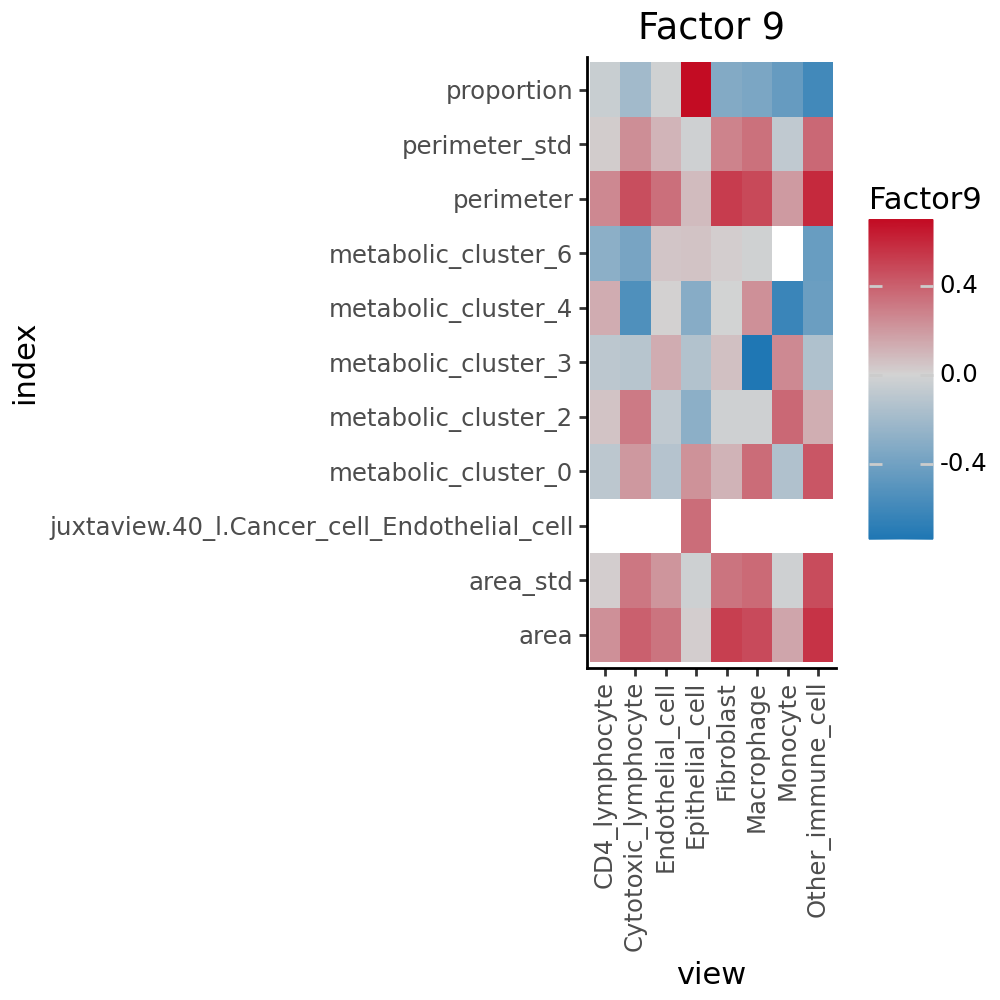

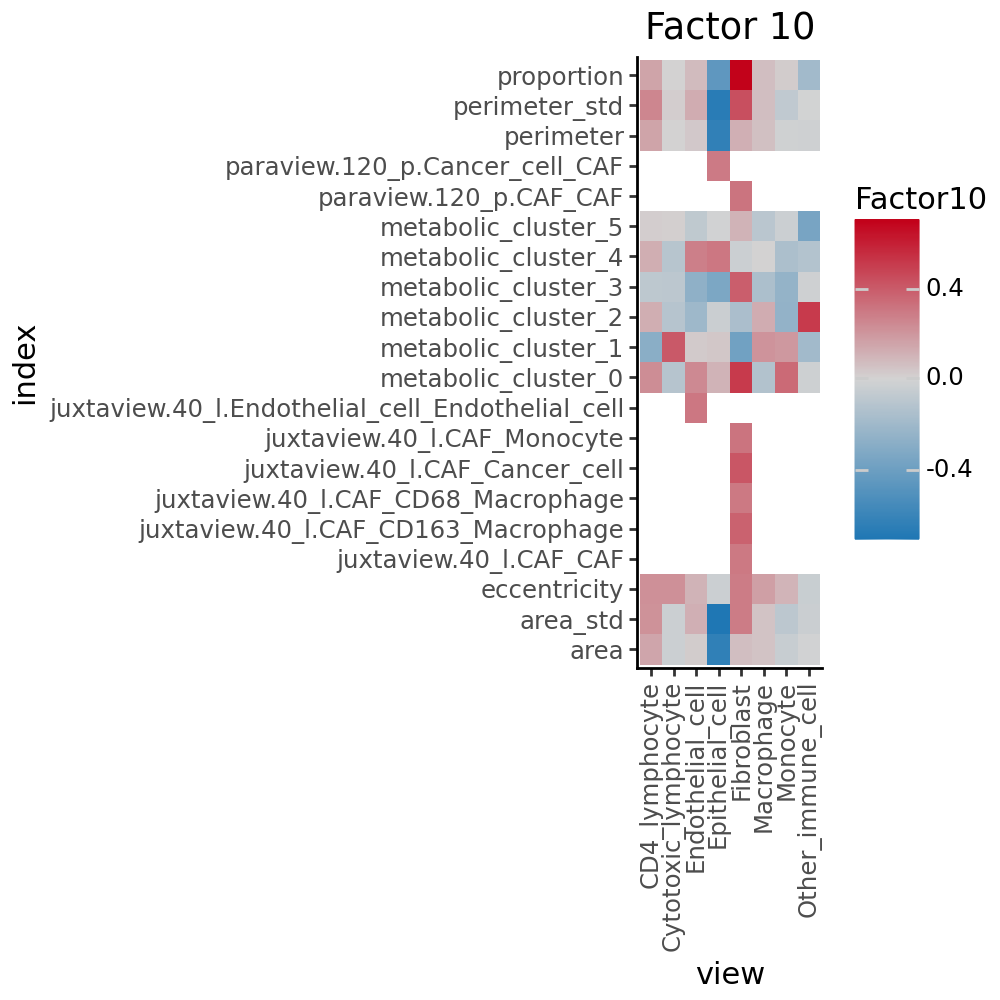

In [91]:
# get top genes with highest absolute loadings across all views
top_genes = variable_loadings['index'].head(30)
top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]
# ^ Note that the genes with the lowest loadings are equally interesting

for fnum in range(1, top_loadings.shape[1] - 1):
    variable_loadings = variable_loadings.sort_values(by=f'Factor{fnum}', key=lambda x: abs(x), ascending=False) # Default
    top_genes = variable_loadings['index'].head(30)
    top_loadings = variable_loadings[variable_loadings['index'].isin(top_genes)]

    # plot them
    # dotplot of variable, view, loadings
    gp = (ggplot(top_loadings) +
        ggtitle(f"Factor {fnum}") +
        aes(x='view', y='index', fill=f'Factor{fnum}') +
        geom_tile() +
        scale_fill_gradient2(low='#1f77b4', mid='lightgray', high='#c20019') +
        theme_classic() +
        theme(axis_text_x=element_text(angle=90, hjust=0.5), figure_size=(5, 5))
    )
    gp.show()

In [92]:
features.obsm["X_muvi"] = model.get_factor_scores()
# obtain factor scores
factor_scores = li.ut.get_factor_scores(features, obsm_key='X_muvi', obs_keys=['Stage'])
factor_scores.head()

index   Factor1   Factor2   Factor3   Factor4   Factor5   Factor6   Factor7  \
0   A1a -0.712485 -2.416014  0.195795 -0.263434  0.225462 -0.502634 -0.906161   
1   A1c  0.464268  0.237332 -0.595026 -0.364319 -0.292200 -1.217334 -0.382400   
2   A1d -0.707625 -0.337837  0.087432  0.129730 -0.284790 -1.023083 -0.711751   
3   A1e -0.516760  0.274609  0.554536 -0.383790 -0.388098 -1.195674  0.361738   
4   A1f -0.733109 -0.680994  0.148890  0.322669 -0.041820 -0.893199 -0.771590   

    Factor8   Factor9  Factor10 Stage  
0 -1.906553  0.215865 -0.341977   pT3  
1 -0.671112  0.473006  0.786761   pT4  
2 -0.490009  1.171780  0.399686   pT3  
3 -1.509138 -0.774577 -0.703957   pT4  
4 -1.244487  0.492366  0.505745   pT1

In [93]:
# Kruksal Wallis test for factor 1 and stage
from scipy.stats import kruskal
for fnum in range(1, top_loadings.shape[1] - 1):
    factor1 = factor_scores[f'Factor{fnum}']
    stage = factor_scores['Stage']
    print(kruskal(factor1[stage == 'pT1'], factor1[stage == 'pT2'], factor1[stage == 'pT3'], factor1[stage == 'pT4'], factor1[stage == 'Colon-no.']))
    # Note: multiply by 10 for Bonferroni correction

KruskalResult(statistic=13.07730976306766, pvalue=0.010904157798210124)
KruskalResult(statistic=11.335038029677662, pvalue=0.023045812740275534)
KruskalResult(statistic=10.049115158252334, pvalue=0.03960842094128547)
KruskalResult(statistic=6.01541080921038, pvalue=0.198000337178164)
KruskalResult(statistic=8.869659982703524, pvalue=0.0644412223781727)
KruskalResult(statistic=23.03677465793885, pvalue=0.0001245019998440399)
KruskalResult(statistic=6.375375680603611, pvalue=0.17281405540492192)
KruskalResult(statistic=5.302586647988392, pvalue=0.2576348816412955)
KruskalResult(statistic=8.03401803146403, pvalue=0.0903399887581493)
KruskalResult(statistic=7.864491402580143, pvalue=0.096670083431718)


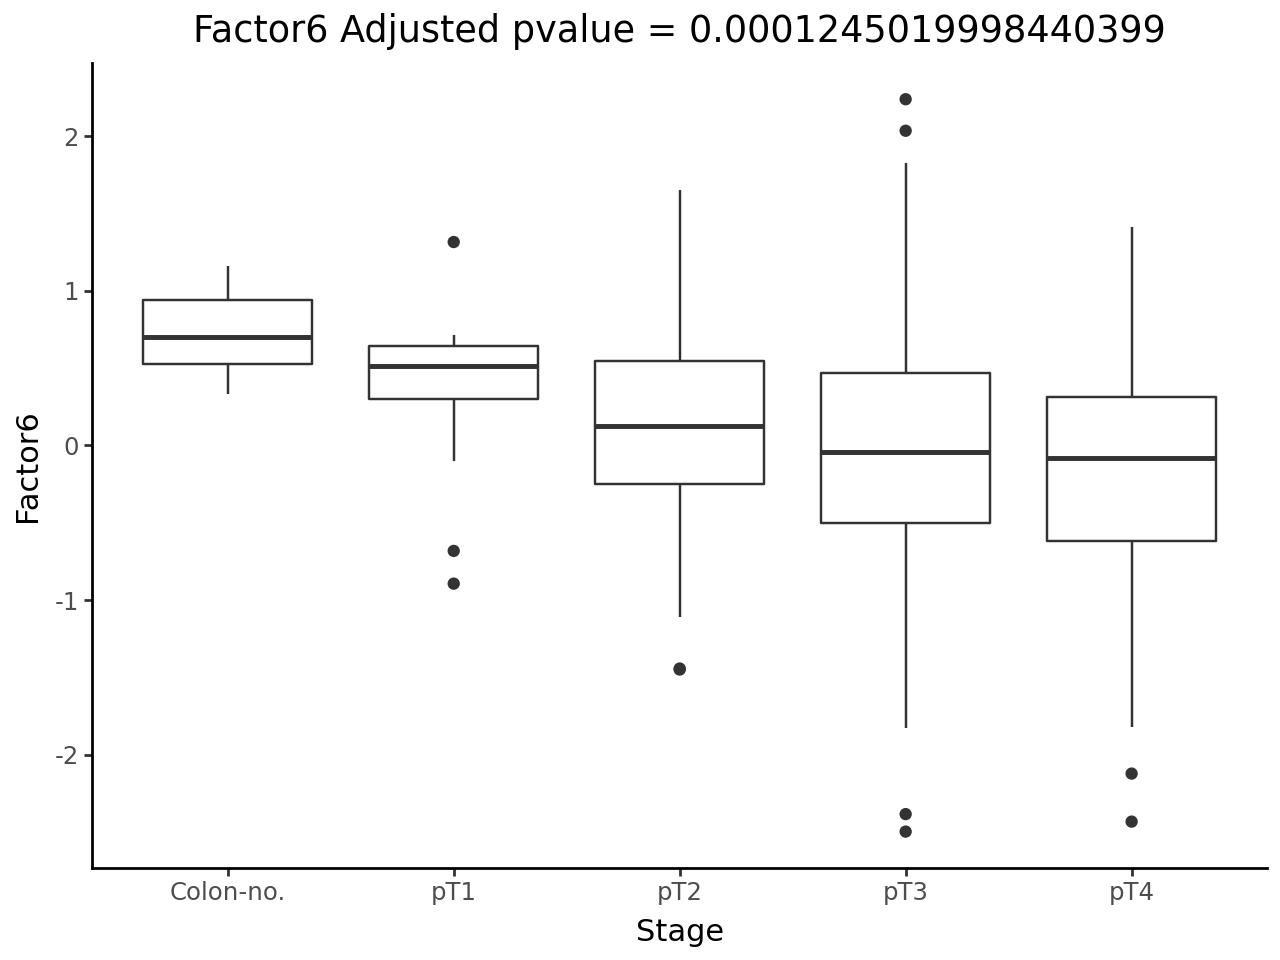

In [94]:
# Factors 6 is associated with disease stage
for f in ["Factor6"]:
    gp = ggplot(factor_scores, aes(y=f, x='Stage')) + \
            geom_boxplot() + theme_classic() + \
            ggtitle(f + " Adjusted pvalue = " + str(kruskal(factor_scores[f][factor_scores['Stage'] == 'pT1'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT2'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT3'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'pT4'], 
                                                 factor_scores[f][factor_scores['Stage'] == 'Colon-no.'])[1]))
    gp.show()

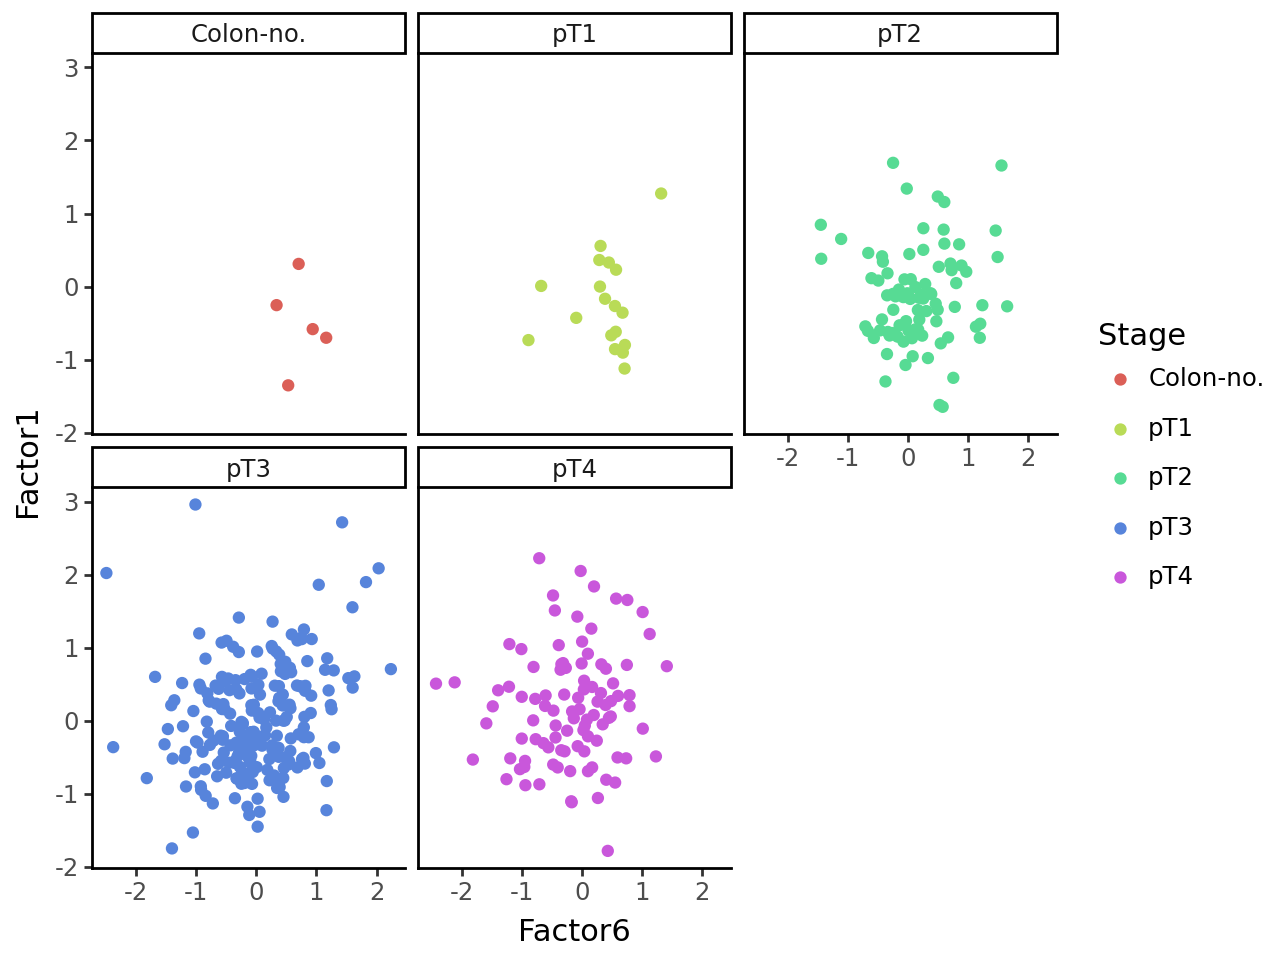

In [95]:
ggplot(factor_scores, aes(x='Factor6', y='Factor1', color='Stage')) + geom_point() + facet_wrap('~Stage') + theme_classic()

### Other info

Block A?
A-Q
1-9
Block B?
A-L
1-9
Block C?
A-Q
1-9
Block D?
1-9
Block E
A-E
1-4

Currently naming so that 
A B
C D E
<-a-q->
^
|
1
|
9
|
v

No sparsity in factor-feature? 0.1 cut-off? Meaning of factors 1/2? Effect size of batch effect / different confounding scales from the different features?